##뉴스 카테고리 다중분류

개발 환경
<br/>데이터 정보

데이터 탐색
<br/>정수 시퀀스 데이터
<br/>텍스트 데이터 복원
<br/>TF-IDF Matrix

데이터 전처리

Multiclass Text Classifier

Naive Bayes Classifier&emsp;&emsp;| &ensp;Multinomial Naive Bayes Classifier(MNB), Complement Naive Bayes Classifier(CNB)
<br/>Linear Classifier &emsp;&emsp;&emsp;&ensp;&ensp;&nbsp; | &ensp;Logistic Regression, Passive Aggressive Classifier, Ridge Classifier, SGD Classifier
<br/>Support Vector Machine &nbsp;&ensp;| &ensp;Linear SVC, Radial Basis Function SVC, Polynomial SVC
<br/>Decision Tree &emsp;&emsp;&emsp;&emsp;&emsp;&ensp;| &ensp;Decision Tree Classifier, ExtraTrees Classifier
<br/>Ensemble Method &emsp;&emsp;&emsp;&nbsp; | &ensp;Random Forest, AdaBoost Classifier, Gradient Boosting Classifier, XGB Classifier, LGBM Classifier
<br/>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&ensp; |&emsp;CatBoost Classifier, Bagging Classifier, Voting Classifier
<br/>Nearest Neighbors &emsp;&emsp;&emsp;&nbsp;| &ensp;KNeighbors Classifier
<br/>Neural Network Model &emsp;&ensp;| &ensp;MLP Classifier
<br/>Dummy Classifier &emsp;&emsp;&emsp;&ensp;&ensp;&nbsp; 
<br/>Deep Learning &emsp;&emsp;&emsp;&emsp;&emsp; | &ensp;DNN, 1-D CNN

모델 평가
<br/>Model Performance
<br/>Vocabulary Size

결론
<br/>참고문헌

##개발 환경

In [ ]:
!pip install catboost

In [ ]:
import math
import numpy as np
import pandas as pd

In [ ]:
import warnings
warnings.filterwarnings(action='ignore')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import tensorflow
import sklearn

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
from sklearn.naive_bayes import MultinomialNB 
from sklearn.naive_bayes import ComplementNB

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier

In [ ]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.dummy import DummyClassifier

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.utils import to_categorical

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, Dropout
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.preprocessing import sequence
from keras.utils import np_utils

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
pip freeze > '/content/drive/MyDrive/lms/library_version.txt'

In [ ]:
library_name = ['tensorflow=', 'pandas=', 'numpy=', 'matplotlib=', 
                'scikit-learn=', 'seaborn=', 'keras=', 
                'xgboost', 'lightgbm', 'catboost']
library_version = []
count = 0

import sys
print(sys.version)
print()

with open('/content/drive/MyDrive/lms/library_version.txt', 'r') as f:
    lines = f.read().splitlines() 

for i in range(len(lines)):
  for line in lines[i:i+1]:
    for library in library_name:
      if library in line:
        library_version.append(line)
        count += 1
        print(line, end = '    ')
        if count % 3 == 0:
          print()

3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0]

catboost==1.0.6      keras==2.8.0      lightgbm==2.2.3     
matplotlib==3.2.2      numpy==1.21.6      pandas==1.3.5     
scikit-learn==1.0.2      seaborn==0.11.2      sklearn-pandas==1.8.0     
tensorflow==2.8.2+zzzcolab20220527125636      xgboost==0.90     


In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Google Colab에서 할당된 GPU를 확인한다.
<br/>고용량 메모리 VM에 액세스한다.

#데이터 정보

[Reuters-21578 Text Categorization Collection](https://kdd.ics.uci.edu/databases/reuters21578/reuters21578.html)

로이터 뉴스 데이터는 총 46개의 클래스로 구성된다.
<br/>해당 뉴스가 어느 카테고리에 속하는지를 예측하기 위한 데이터이다.

David D. Lewis 교수의 AT&T Labs에서 통신사 Reuters의 텍스트 데이터를 수집한 데이터이다.
<br/>Reuters는 영국의 발전과 해저전선망 부설로 20세기 초에는 세계 최대의 통신사로 성장했으나
<br/>현재는 영국 국내 통신사 PA의 소유로 넘어가 비영리업체로 운영되고 있다.
<br/>Reuters는 경제뉴스 판매 수익이 전체의 80% 이상일 정도로 경제 뉴스에 초점을 둔다.

통신사는 독자적인 취재조직을 가지고 신문사와 방송국 및 기타 보도 기관을 대신해 뉴스와 기사 자료를 수집·배포하는 기구를 말한다.
<br/>

#데이터 탐색

##정수 시퀀스 데이터

In [ ]:
from tensorflow.keras.datasets import reuters

In [ ]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000, test_split=0.2)

In [ ]:
print('Train Data : {}'.format(len(x_train)))
print('Test Data : {}'.format(len(x_test)))

Train Data : 8982
Test Data : 2246


keras 라이브러리에서 로이터 뉴스 데이터를 제공한다.
<br/>num_words는 데이터에서 빈도수 기준으로 상위 10000번째 단어까지 사용하는 것으로 설정한다.
<br/>정수 번호가 10,000이 넘는 단어들을 자동으로 unk 토큰으로 처리한다.
<br/>unk은 정수 2번을 가지도록 약속돼 있으므로 정수 2로 변환된다.

In [ ]:
print('Number Sequence')
print(x_train[0])
print(x_test[0])

print()
print('Label')
print(y_train[0])
print(y_test[0])

print()
num_classes = max(y_train) + 1
print('Class : {}'.format(num_classes))

Number Sequence
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
[1, 4, 1378, 2025, 9, 697, 4622, 111, 8, 25, 109, 29, 3650, 11, 150, 244, 364, 33, 30, 30, 1398, 333, 6, 2, 159, 9, 1084, 363, 13, 2, 71, 9, 2, 71, 117, 4, 225, 78, 206, 10, 9, 1214, 8, 4, 270, 5, 2, 7, 748, 48, 9, 2, 7, 207, 1451, 966, 1864, 793, 97, 133, 336, 7, 4, 493, 98, 273, 104, 284, 25, 39, 338, 22, 905, 220, 3465, 644, 59, 20, 6, 119, 61, 11, 15, 58, 579, 26, 10, 67, 7, 4, 738, 98, 43, 88, 333, 722, 12, 20, 6, 19, 746, 35, 15, 10, 9, 1214, 855, 129, 783, 21, 4, 2280, 244, 364, 51, 16, 299, 452, 16, 515, 4, 99, 29, 5, 4, 364, 281, 48, 10, 9, 1214, 23, 644, 47, 20, 324, 27, 56, 2, 2, 5, 192, 510, 17, 12]

Label

첫 번째 훈련용 뉴스와 시험용 뉴스의 정수 시퀀스, 레이블을 출력한다.
<br/>그리고 뉴스 데이터의 클래스를 출력한다.
<br/>케라스 데이터셋에서는 이미 텍스트에서 숫자로 전처리한 데이터를 제공한다.

뉴스의 최소 길이 : 13
뉴스의 최대 길이 : 2376
뉴스의 평균 길이 : 145.5398574927633



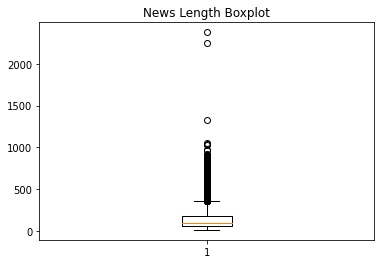

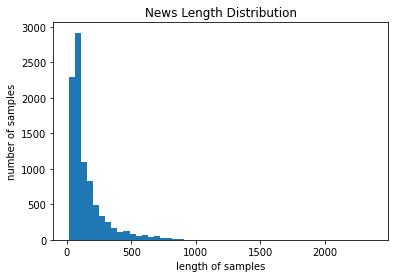

In [ ]:
print('뉴스의 최소 길이 : {}'.format(min(len(l) for l in x_train)))
print('뉴스의 최대 길이 : {}'.format(max(len(l) for l in x_train)))
print('뉴스의 평균 길이 : {}'.format(sum(map(len, x_train))/len(x_train)))

sentence_length = []

for l in x_train:
   sentence_length.append(len(l))

print()
plt.boxplot(sentence_length)
plt.title("News Length Boxplot")
plt.show()

print()
plt.hist([len(s) for s in x_train], bins=50)
plt.title("News Length Distribution")
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

News Class Frequency
Index
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Frequency
[  55  432   74 3159 1949   17   48   16  139  101  124  390   49  172
   26   20  444   39   66  549  269  100   15   41   62   92   24   15
   48   19   45   39   32   11   50   10   49   19   19   24   36   30
   13   21   12   18]




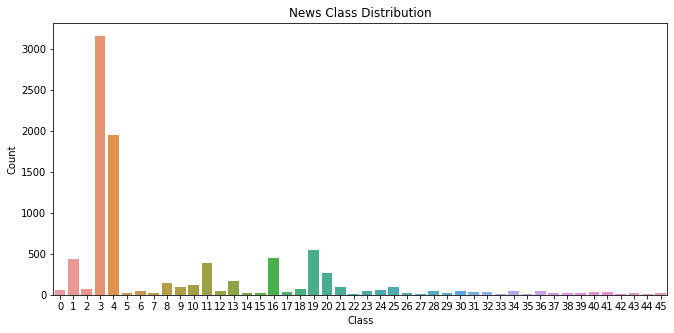

In [ ]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("News Class Frequency")
print("Index")
print(np.asarray(unique_elements))
print("Frequency")
print(np.asarray(counts_elements))
print()
print()

fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(11,5)
sns.countplot(x=y_train)
plt.title("News Class Distribution")
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

뉴스 데이터는 3번, 4번 클래스가 대부분을 차지한다.
<br/> 그 뒤로는 19번, 16번, 1번, 11번 등이 높은 분포를 가지고 있다.

##텍스트 데이터 복원

정수 시퀀스로 변환된 데이터를 다시 텍스트로 복원한다.

In [ ]:
word_index = reuters.get_word_index(path="reuters_word_index.json")

In [ ]:
sentence = "Where shall we eat tonight"

for I in sentence.split():
  i = I.lower()
  print(i, ':', word_index[i])

where : 693
shall : 5829
we : 112
eat : 10631
tonight : 2896


 로이터 뉴스 데이터는 단어를 key값으로, 고유한 정수를 value로 가지는 dictionary를 제공한다.
 <br/>dictionary 유형의 word_index를 저장한다.

In [ ]:
index_to_word = { index + 3 : word for word, index in word_index.items() }

In [ ]:
for I in sentence.split():
  i = I.lower()
  print(word_index[i] + 3, ':', index_to_word[ word_index[i] + 3 ])

696 : where
5832 : shall
115 : we
10634 : eat
2899 : tonight


로이터 뉴스 데이터가 정의한 일종의 약속이 있다.
<br/>reuters.get_word_index에는 실제 단어에 맵핑 한 정수에 -3을 한 정수를 입력해 놓은 것이다.
<br/>그러므로 word_index에서 index_word를 만들 때, 각 정수에 +3을 한다.

In [ ]:
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index] = token

토큰 pad, sos, unk의 mapping 번호는 0, 1, 2이다.

In [ ]:
print(' '.join([index_to_word[index] for index in x_train[0]]))

<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [ ]:
print(' '.join([index_to_word[index] for index in [4, 587, 23, 133, 6, 30, 515]]))

the transaction is expected to be completed


첫 번째 훈련용 뉴스 기사를 텍스트로 복원한다.

In [ ]:
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded
print('Train Data : ', len(x_train))

decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded
print('Test Data : ', len(x_test))

Train Data :  8982
Test Data :  2246


전체 훈련용 뉴스 데이터와 전체 시험용 뉴스 데이터를 텍스트 데이터로 변환한다.

In [ ]:
print(x_train[0])
print()
print(x_test[0])

<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3

<sos> the great atlantic and pacific tea co said its three year 345 mln dlr capital program will be be substantially increased to <unk> growth and expansion plans for <unk> inc and <unk> inc over the next two years a and p said the acquisition of <unk> in august 1986 and <unk> in december helped us achieve better than expected results in the fourth quarter ended february 28 its net income from continuing operations jumped 52 6 pct to 20 7 mln dlrs or 55 cts a share in the latest quarter as sales increased 48 3 pct to 1 58 billion dlrs a and p gave no details on the expanded capital program 

##TF-IDF Matrix

In [ ]:
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

(8982, 9670)


DTM은 사이킷런의 CountVectorizer()를 통해서 생성한다.
<br/>훈련용 뉴스의 수가 총 8,982개였기 때문에 DTM의 행의 개수는 8,982개가 된다.
<br/>DTM이 자체적인 규칙에 따라서 불필요하다고 판단하는 토큰을 제거하기 때문에 <br/>DTM 열의 개수는 10,000개보다 적은 9,670개가 된다.

In [ ]:
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

(8982, 9670)


TF-IDF Matrix는 사이킷런의 TfidfTransformer()를 통해서 생성한다.

#데이터 전처리

In [ ]:
from tensorflow.keras.datasets import reuters

In [ ]:
word_index = reuters.get_word_index(path="reuters_word_index.json")

In [ ]:
index_to_word = { index + 3 : word for word, index in word_index.items() }

In [ ]:
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index] = token

In [ ]:
dtmvector = CountVectorizer()
tfidf_transformer = TfidfTransformer()

word index, index to word, dimvector, tfidf_transformer를 불러온다.

```
(none_x_train, none_y_train), (none_x_test, none_y_test) = reuters.load_data(num_words=n, test_split=0.2)
```

reuters.load_data에서 num_words는 사용 단어의 수를 조정한다.
<br/>빈도수가 많은 순서대로 나열했을 때 num_words의 인자로 준 정수만큼의 단어를 사용하고
<br/>나머지 단어는 전부 unk로 처리하는 원리이다.

##None

In [ ]:
(none_x_train, none_y_train), (none_x_test, none_y_test) = reuters.load_data(num_words=None, test_split=0.2)

In [ ]:
decoded = []
for i in range(len(none_x_train)):
    t = ' '.join([index_to_word[index] for index in none_x_train[i]])
    decoded.append(t)

none_x_train = decoded

decoded = []
for i in range(len(none_x_test)):
    t = ' '.join([index_to_word[index] for index in none_x_test[i]])
    decoded.append(t)

none_x_test = decoded

In [ ]:
none_x_train_dtm = dtmvector.fit_transform(none_x_train)
none_tfidfv_train = tfidf_transformer.fit_transform(none_x_train_dtm)

In [ ]:
none_x_test_dtm = dtmvector.transform(none_x_test) 
none_tfidfv_test = tfidf_transformer.transform(none_x_test_dtm) 

num_words=None은 로우터 뉴스의 모든 단어를 사용한다.
<br/>단어 하나도 제외하지 않는다는 default 설정이다.

##10000

In [ ]:
(ten_x_train, ten_y_train), (ten_x_test, ten_y_test) = reuters.load_data(num_words=10000, test_split=0.2)

In [ ]:
decoded = []
for i in range(len(ten_x_train)):
    t = ' '.join([index_to_word[index] for index in ten_x_train[i]])
    decoded.append(t)

ten_x_train = decoded

decoded = []
for i in range(len(ten_x_test)):
    t = ' '.join([index_to_word[index] for index in ten_x_test[i]])
    decoded.append(t)

ten_x_test = decoded

In [ ]:
ten_x_train_dtm = dtmvector.fit_transform(ten_x_train)
ten_tfidfv_train = tfidf_transformer.fit_transform(ten_x_train_dtm)

In [ ]:
ten_x_test_dtm = dtmvector.transform(ten_x_test) 
ten_tfidfv_test = tfidf_transformer.transform(ten_x_test_dtm) 

num_words=10000은 빈도수 상위 10000개의 단어만 사용한다.

##5000

In [ ]:
(five_x_train, five_y_train), (five_x_test, five_y_test) = reuters.load_data(num_words=5000, test_split=0.2)

In [ ]:
decoded = []
for i in range(len(five_x_train)):
    t = ' '.join([index_to_word[index] for index in five_x_train[i]])
    decoded.append(t)

five_x_train = decoded

decoded = []
for i in range(len(five_x_test)):
    t = ' '.join([index_to_word[index] for index in five_x_test[i]])
    decoded.append(t)

five_x_test = decoded

In [ ]:
five_x_train_dtm = dtmvector.fit_transform(five_x_train)
five_tfidfv_train = tfidf_transformer.fit_transform(five_x_train_dtm)

In [ ]:
five_x_test_dtm = dtmvector.transform(five_x_test) 
five_tfidfv_test = tfidf_transformer.transform(five_x_test_dtm) 

num_words=5000은 빈도수 상위 5000개의 단어만 사용한다.

##1000

In [ ]:
(one_x_train, one_y_train), (one_x_test, one_y_test) = reuters.load_data(num_words=5000, test_split=0.2)

In [ ]:
decoded = []
for i in range(len(one_x_train)):
    t = ' '.join([index_to_word[index] for index in one_x_train[i]])
    decoded.append(t)

one_x_train = decoded

decoded = []
for i in range(len(one_x_test)):
    t = ' '.join([index_to_word[index] for index in one_x_test[i]])
    decoded.append(t)

one_x_test = decoded

In [ ]:
one_x_train_dtm = dtmvector.fit_transform(one_x_train)
one_tfidfv_train = tfidf_transformer.fit_transform(one_x_train_dtm)

In [ ]:
one_x_test_dtm = dtmvector.transform(one_x_test) 
one_tfidfv_test = tfidf_transformer.transform(one_x_test_dtm) 

num_words=1000은 빈도수 상위 1000개의 단어만 사용한다.

#Multiclass Text Classifier

[scikit-learn 1.1.1](https://scikit-learn.org/stable/modules/classes.html)에서 제공하는 머신러닝 다중 분류 알고리즘을 사용하는 것이 이번 프로젝트의 목표이다.
<br/>로이터 뉴스 데이터에는 다중 분류 알고리즘을 사용하는 것이 적절하다.

#Naive Bayes Classifier

연속형 변수에는 Gaussian Naive Bayes Classifier(GNB)
<br/>빈도수 변수에는 Multinomial Naive Bayes Classifier(MNB)
<br/>이진형 변수에는 Bernoulli Naive Bayes Classifier(BNB)
<br/>범주형 변수에는 Categorical Naive Bayes Classifier(CNB)가 쓰인다.

따라서 로우터 뉴스 데이터에는 Multinomial Naive Bayes Classifier(MNB)가 쓰인다.
<br/>MNB를 보완한 Complement Naive Bayes Classifier(CNB)도 함께 쓰인다.

##Multinomial Naive Bayes Classifier(MNB)

In [ ]:
none_mnb_model = MultinomialNB()
none_mnb_model.fit(none_tfidfv_train, none_y_train)

Predicted Label :  4



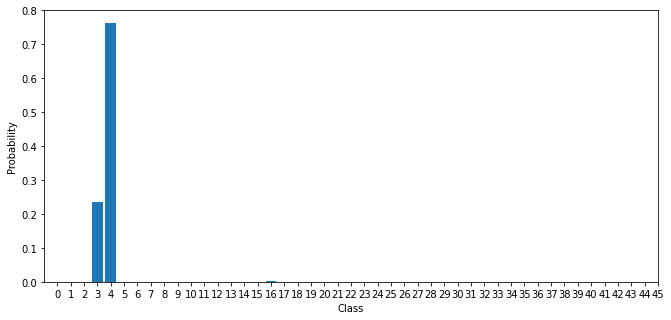

In [ ]:
print("Predicted Label : ", str(none_mnb_model.predict(none_tfidfv_test[3])).replace("[","").replace("]",""))
print()
probability_3 = none_mnb_model.predict_proba(none_tfidfv_test[3])[0]

plt.rcParams["figure.figsize"] = (11,5)
plt.bar(none_mnb_model.classes_, probability_3)
plt.xlim(-1, 21)
plt.xticks(none_mnb_model.classes_)
plt.xlabel("Class")
plt.ylabel("Probability")
plt.show()

모델은 4번 클래스를 약 80%의 확률로 확신하는데, 20%의 확률로 3번 클래스라고 판단한다.
<br/>그러므로 모델이 예측한 레이블은 4번 클래스다.

In [ ]:
def graph_confusion_matrix(model, x_test, y_test):#, classes_name):
  df_cm = pd.DataFrame(confusion_matrix(y_test, model.predict(x_test)))#, index=classes_name, columns=classes_name)
  fig = plt.figure(figsize=(10,10))
  heatmap = sns.heatmap(df_cm, annot=True, fmt="d", cmap='YlGnBu')
  heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
  heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=12)
  plt.ylabel('label')
  plt.xlabel('predicted value')

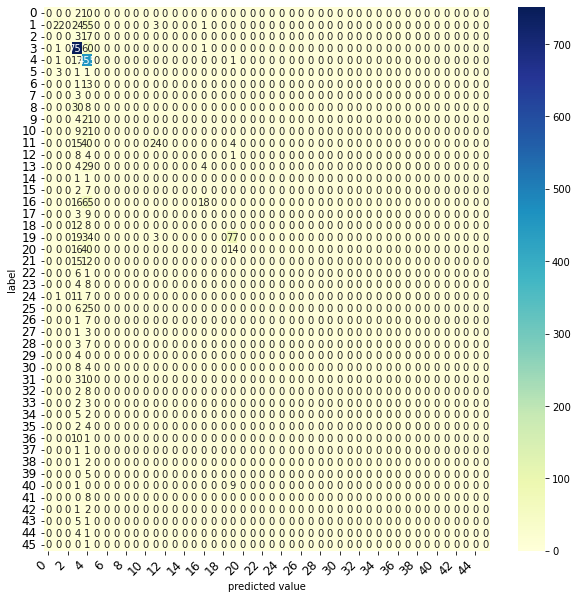

In [ ]:
graph_confusion_matrix(none_mnb_model, none_tfidfv_test, none_y_test)

그래프에서 보여주고 싶은 부분만 crop할 수 있을까?
<br/>예를 들면 특정 수치가 큰 부분만 잘라서 보여주는 것이다.
<br/>numpy의 array 구조를 이해한다면 특정 부분을 강조한 그래프 함수를 짤 수 있을 것이다.

In [ ]:
print(classification_report(none_y_test, none_mnb_model.predict(none_tfidfv_test), zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.79      0.21      0.33       105
           2       0.00      0.00      0.00        20
           3       0.72      0.92      0.81       813
           4       0.45      0.96      0.61       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       0.00      0.00      0.00        25
          10       0.00      0.00      0.00        30
          11       0.80      0.29      0.42        83
          12       0.00      0.00      0.00        13
          13       0.00      0.00      0.00        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.75      0.18      0.29        99
          17       0.00    

각각의 클래스를 양성(positive) 클래스로 보았을 때의 정밀도, 재현율, F1점수를 각각 구하고
<br/>그 평균값으로 전체 모델의 성능을 평가한다.

macro: 단순평균
<br/>weighted: 각 클래스에 속하는 표본의 개수로 가중평균
<br/>accuracy: 정확도. 전체 학습 데이터의 개수에서 클래스를 정확하게 맞춘 개수의 비율

In [ ]:
none_mnb_predicted = none_mnb_model.predict(none_tfidfv_test) 
none_mnb_accuracy = accuracy_score(none_y_test, none_mnb_predicted)
print("accuracy :", none_mnb_accuracy) 

accuracy : 0.5997328584149599


num_words=None일 때, Multinomial Naive Bayes Classifier(MNB) 모델의 성능 'accuracy'는 59.97%이다.

<br/>

In [ ]:
ten_mnb_model = MultinomialNB()
ten_mnb_model.fit(ten_tfidfv_train, ten_y_train)
ten_mnb_predicted = ten_mnb_model.predict(ten_tfidfv_test) 
ten_mnb_accuracy = accuracy_score(ten_y_test, ten_mnb_predicted)
print("accuracy :", ten_mnb_accuracy) 

accuracy : 0.6567230632235085


num_words=10000일 때, Multinomial Naive Bayes Classifier(MNB) 모델의 성능 'accuracy'는 65.67%이다.

<br/>

In [ ]:
five_mnb_model = MultinomialNB()
five_mnb_model.fit(five_tfidfv_train, five_y_train)
five_mnb_predicted = five_mnb_model.predict(five_tfidfv_test) 
five_mnb_accuracy = accuracy_score(five_y_test, five_mnb_predicted)
print("accuracy :", five_mnb_accuracy) 

accuracy : 0.6731967943009796


num_words=5000일 때, Multinomial Naive Bayes Classifier(MNB) 모델의 성능 'accuracy'는 67.32%이다.

<br/>

In [ ]:
one_mnb_model = MultinomialNB()
one_mnb_model.fit(one_tfidfv_train, one_y_train)
one_mnb_predicted = one_mnb_model.predict(one_tfidfv_test) 
one_mnb_accuracy = accuracy_score(one_y_test, one_mnb_predicted)
print("accuracy :", one_mnb_accuracy) 

accuracy : 0.6731967943009796


num_words=1000일 때, Multinomial Naive Bayes Classifier(MNB) 모델의 성능 'accuracy'는 67.32%이다.

<br/>

In [ ]:
mnb_model_comparison = [round(none_mnb_accuracy, 4), round(ten_mnb_accuracy, 4),
                        round(five_mnb_accuracy, 4), round(one_mnb_accuracy, 4)]

mnb_model_name = ['mnb_none', 'mnb_10000', 'mnb_5000', 'mnb_1000']

mnb_df = pd.DataFrame({"Model": mnb_model_name,
                  "Accuracy":mnb_model_comparison})
mnb_df_sorted = mnb_df.sort_values('Accuracy',ascending=False)
mnb_df_sorted

,Model,Accuracy
2,mnb_5000,0.6732
3,mnb_1000,0.6732
1,mnb_10000,0.6567
0,mnb_none,0.5997


num_words=n에서 n이 작아질수록 Multinomial Naive Bayes Classifier(MNB) 모델의 성능이 높다.

<br/>

##Complement Naive Bayes Classifier(CNB)

In [ ]:
none_cnb_model = ComplementNB()
none_cnb_model.fit(none_tfidfv_train, none_y_train)
none_cnb_predicted = none_cnb_model.predict(none_tfidfv_test) 
none_cnb_accuracy = accuracy_score(none_y_test, none_cnb_predicted)
print("accuracy :", none_cnb_accuracy) 

accuracy : 0.7649154051647373


num_words=None일 때, Complement Naive Bayes Classifier(CNB)) 모델의 성능 'accuracy'는 76.49%이다.

<br/>

In [ ]:
ten_cnb_model = ComplementNB()
ten_cnb_model.fit(ten_tfidfv_train, ten_y_train)
ten_cnb_predicted = ten_cnb_model.predict(ten_tfidfv_test) 
ten_cnb_accuracy = accuracy_score(ten_y_test, ten_cnb_predicted)
print("accuracy :", ten_cnb_accuracy) 

accuracy : 0.7707034728406055



num_words=10000일 때, Complement Naive Bayes Classifier(CNB) 모델의 성능 'accuracy'는 77.07%이다.

<br/>

In [ ]:
five_cnb_model = ComplementNB()
five_cnb_model.fit(five_tfidfv_train, five_y_train)
five_cnb_predicted = five_cnb_model.predict(five_tfidfv_test) 
five_cnb_accuracy = accuracy_score(five_y_test, five_cnb_predicted)
print("accuracy :", five_cnb_accuracy) 

accuracy : 0.7707034728406055


num_words=5000일 때, Complement Naive Bayes Classifier(CNB) 모델의 성능 'accuracy'는 77.07%이다.

<br/>

In [ ]:
one_cnb_model = ComplementNB()
one_cnb_model.fit(one_tfidfv_train, one_y_train)
one_cnb_predicted = one_cnb_model.predict(one_tfidfv_test) 
one_cnb_accuracy = accuracy_score(one_y_test, one_cnb_predicted)
print("accuracy :", one_cnb_accuracy) 

accuracy : 0.7707034728406055


num_words=1000일 때, Complement Naive Bayes Classifier(CNB) 모델의 성능 'accuracy'는 77.07%이다.

<br/>

In [ ]:
cnb_model_comparison = [round(none_cnb_accuracy, 4), round(ten_cnb_accuracy, 4),
                        round(five_cnb_accuracy, 4), round(one_cnb_accuracy, 4)]

cnb_model_name = ['cnb_none', 'cnb_10000', 'cnb_5000', 'cnb_1000']

cnb_df = pd.DataFrame({"Model": cnb_model_name,
                  "Accuracy":cnb_model_comparison})
cnb_df_sorted = cnb_df.sort_values('Accuracy',ascending=False)
cnb_df_sorted

,Model,Accuracy
1,cnb_10000,0.7707
2,cnb_5000,0.7707
3,cnb_1000,0.7707
0,cnb_none,0.7649


Complement Naive Bayes Classifier(CNB) 모델의 성능은 num_words=n에 큰 영향을 받지 않는다.

<br/>

#Linear Classifier

##Logistic Regression

In [ ]:
none_lr_model = LogisticRegression(C=10000, penalty='l2')
none_lr_model.fit(none_tfidfv_train, none_y_train)
none_lr_predicted = none_lr_model.predict(none_tfidfv_test) 
none_lr_accuracy = accuracy_score(none_y_test, none_lr_predicted)
print("accuracy :", none_lr_accuracy) 

accuracy : 0.813446126447017


num_words=None일 때, Logistic Regression 모델의 성능 'accuracy'는 81.34%이다.

<br/>

In [ ]:
ten_lr_model = LogisticRegression(C=10000, penalty='l2')
ten_lr_model.fit(ten_tfidfv_train, ten_y_train)
ten_lr_predicted = ten_lr_model.predict(ten_tfidfv_test) 
ten_lr_accuracy = accuracy_score(ten_y_test, ten_lr_predicted)
print("accuracy :", ten_lr_accuracy) 

accuracy : 0.8076580587711487


num_words=10000일 때, Logistic Regression 모델의 성능 'accuracy'는 80.77%이다.

<br/>

In [ ]:
five_lr_model = LogisticRegression(C=10000, penalty='l2')
five_lr_model.fit(five_tfidfv_train, five_y_train)
five_lr_predicted = five_lr_model.predict(five_tfidfv_test) 
five_lr_accuracy = accuracy_score(five_y_test, five_lr_predicted)
print("accuracy :", five_lr_accuracy) 

accuracy : 0.8058771148708815


num_words=5000일 때, Logistic Regression 모델의 성능 'accuracy'는 80.59%이다.

<br/>

In [ ]:
one_lr_model = LogisticRegression(C=10000, penalty='l2')
one_lr_model.fit(one_tfidfv_train, one_y_train)
one_lr_predicted = one_lr_model.predict(one_tfidfv_test) 
one_lr_accuracy = accuracy_score(one_y_test, one_lr_predicted)
print("accuracy :", one_lr_accuracy)  

accuracy : 0.8058771148708815


num_words=1000일 때, Logistic Regression 모델의 성능 'accuracy'는 80.59%이다.

<br/>

In [ ]:
lr_model_comparison = [round(none_lr_accuracy, 4), round(ten_lr_accuracy, 4),
                        round(five_lr_accuracy, 4), round(one_lr_accuracy, 4)]


lr_model_name = ['lr_none', 'lr_10000', 'lr_5000', 'lr_1000']

lr_df = pd.DataFrame({"Model": lr_model_name,
                  "Accuracy":lr_model_comparison})
lr_df_sorted = lr_df.sort_values('Accuracy',ascending=False)
lr_df_sorted

,Model,Accuracy
0,lr_none,0.8134
1,lr_10000,0.8077
2,lr_5000,0.8059
3,lr_1000,0.8059


num_words=n에서 n이 클수록 Logistic Regression  모델의 성능이 높다.

<br/>

##Passive Aggressive Classifier

In [ ]:
none_passiveagre_model = PassiveAggressiveClassifier(max_iter=1000, random_state=0)
none_passiveagre_model.fit(none_tfidfv_train, none_y_train)
none_passiveagre_predicted = none_passiveagre_model.predict(none_tfidfv_test) 
none_passiveagre_accuracy = accuracy_score(none_y_test, none_passiveagre_predicted)
print("accuracy :", none_passiveagre_accuracy) 

accuracy : 0.8143365983971504


num_words=None일 때, Passive Aggressive Classifier 모델의 성능 'accuracy'는 81.43%이다.

<br/>

In [ ]:
ten_passiveagre_model = PassiveAggressiveClassifier(max_iter=1000, random_state=0)
ten_passiveagre_model.fit(ten_tfidfv_train, ten_y_train)
ten_passiveagre_predicted = ten_passiveagre_model.predict(ten_tfidfv_test) 
ten_passiveagre_accuracy = accuracy_score(ten_y_test, ten_passiveagre_predicted)
print("accuracy :", ten_passiveagre_accuracy) 

accuracy : 0.8076580587711487


num_words=10000일 때, Passive Aggressive Classifier 모델의 성능 'accuracy'는 80.77%이다.

<br/>

In [ ]:
five_passiveagre_model = PassiveAggressiveClassifier(max_iter=1000, random_state=0)
five_passiveagre_model.fit(five_tfidfv_train, five_y_train)
five_passiveagre_predicted = five_passiveagre_model.predict(five_tfidfv_test) 
five_passiveagre_accuracy = accuracy_score(five_y_test, five_passiveagre_predicted)
print("accuracy :", five_passiveagre_accuracy) 

accuracy : 0.8040961709706145


num_words=5000일 때, Passive Aggressive Classifier 모델의 성능 'accuracy'는 80.41%이다.

<br/>

In [ ]:
one_passiveagre_model = PassiveAggressiveClassifier(max_iter=1000, random_state=0)
one_passiveagre_model.fit(one_tfidfv_train, one_y_train)
one_passiveagre_predicted = one_passiveagre_model.predict(one_tfidfv_test) 
one_passiveagre_accuracy = accuracy_score(one_y_test, one_passiveagre_predicted)
print("accuracy :", one_passiveagre_accuracy) 

accuracy : 0.8040961709706145


num_words=1000일 때, Passive Aggressive Classifier 모델의 성능 'accuracy'는 80.41%이다.

<br/>

In [ ]:
passiveagre_model_comparison = [round(none_passiveagre_accuracy, 4), round(ten_passiveagre_accuracy, 4),
                        round(five_passiveagre_accuracy, 4), round(one_passiveagre_accuracy, 4)]

passiveagre_model_name = ['passiveagre_none', 'passiveagre_10000', 'passiveagre_5000', 'passiveagre_1000']

passiveagre_df = pd.DataFrame({"Model": passiveagre_model_name,
                  "Accuracy":passiveagre_model_comparison})
passiveagre_df_sorted = passiveagre_df.sort_values('Accuracy',ascending=False)
passiveagre_df_sorted

,Model,Accuracy
0,passiveagre_none,0.8143
1,passiveagre_10000,0.8077
2,passiveagre_5000,0.8041
3,passiveagre_1000,0.8041


num_words=n에서 n이 클수록 Passive Aggressive Classifier 모델의 성능이 높다.

<br/>

##Ridge Classifier

In [ ]:
none_ridge_model =  RidgeClassifier()
none_ridge_model.fit(none_tfidfv_train, none_y_train)
none_ridge_predicted = none_ridge_model.predict(none_tfidfv_test) 
none_ridge_accuracy = accuracy_score(none_y_test, none_ridge_predicted)
print("accuracy :", none_ridge_accuracy) 

accuracy : 0.8392698130008904


num_words=None일 때, Ridge Classifier모델의 성능 'accuracy'는 83.93%이다.

In [ ]:
ten_ridge_model =  RidgeClassifier()
ten_ridge_model.fit(ten_tfidfv_train, ten_y_train)
ten_ridge_predicted = ten_ridge_model.predict(ten_tfidfv_test) 
ten_ridge_accuracy = accuracy_score(ten_y_test, ten_ridge_predicted)
print("accuracy :", ten_ridge_accuracy) 

accuracy : 0.8392698130008904


num_words=10000일 때, Ridge Classifier 모델의 성능 'accuracy'는 83.93%이다.

<br/>

In [ ]:
five_ridge_model =  RidgeClassifier()
five_ridge_model.fit(five_tfidfv_train, five_y_train)
five_ridge_predicted = five_ridge_model.predict(five_tfidfv_test) 
five_ridge_accuracy = accuracy_score(five_y_test, five_ridge_predicted)
print("accuracy :", five_ridge_accuracy) 

accuracy : 0.8379341050756901


num_words=5000일 때, Ridge Classifier 모델의 성능 'accuracy'는 83.79%이다.

<br/>

In [ ]:
one_ridge_model =  RidgeClassifier()
one_ridge_model.fit(one_tfidfv_train, one_y_train)
one_ridge_predicted = one_ridge_model.predict(one_tfidfv_test) 
one_ridge_accuracy = accuracy_score(one_y_test, one_ridge_predicted)
print("accuracy :", one_ridge_accuracy) 

accuracy : 0.8379341050756901


num_words=1000일 때, Ridge Classifier 모델의 성능 'accuracy'는 83.79%이다.

<br/>

In [ ]:
ridge_model_comparison = [round(none_ridge_accuracy, 4), round(ten_ridge_accuracy, 4),
                        round(five_ridge_accuracy, 4), round(one_ridge_accuracy, 4)]

ridge_model_name = ['ridge_none', 'ridge_10000', 'ridge_5000', 'ridge_1000']

ridge_df = pd.DataFrame({"Model": ridge_model_name,
                  "Accuracy":ridge_model_comparison})
ridge_df_sorted = ridge_df.sort_values('Accuracy',ascending=False)
ridge_df_sorted

,Model,Accuracy
0,ridge_none,0.8393
1,ridge_10000,0.8393
2,ridge_5000,0.8379
3,ridge_1000,0.8379


num_words=n에서 n이 클수록 Ridge Classifier 모델의 성능이 높다.

<br/>

##SGD Classifier

In [ ]:
none_sgd_model = SGDClassifier()
none_sgd_model.fit(none_tfidfv_train, none_y_train)
none_sgd_predicted = none_sgd_model.predict(none_tfidfv_test) 
none_sgd_accuracy = accuracy_score(none_y_test, none_sgd_predicted)
print("accuracy :", none_sgd_accuracy) 

accuracy : 0.8441674087266251


num_words=None일 때, SGD Classifier 모델의 성능 'accuracy'는 84.42%이다.

<br/>

In [ ]:
ten_sgd_model = SGDClassifier()
ten_sgd_model.fit(ten_tfidfv_train, ten_y_train)
ten_sgd_predicted = ten_sgd_model.predict(ten_tfidfv_test) 
ten_sgd_accuracy = accuracy_score(ten_y_test, ten_sgd_predicted)
print("accuracy :", ten_sgd_accuracy) 

accuracy : 0.8410507569011576


num_words=10000일 때, SGD Classifier 모델의 성능 'accuracy'는 84.11%이다.

<br/>

In [ ]:
five_sgd_model = SGDClassifier()
five_sgd_model.fit(five_tfidfv_train, five_y_train)
five_sgd_predicted = five_sgd_model.predict(five_tfidfv_test) 
five_sgd_accuracy = accuracy_score(five_y_test, five_sgd_predicted)
print("accuracy :", five_sgd_accuracy) 

accuracy : 0.8406055209260909


num_words=5000일 때, SGD Classifier 모델의 성능 'accuracy'는 84.06%이다.

<br/>

In [ ]:
one_sgd_model = SGDClassifier()
one_sgd_model.fit(one_tfidfv_train, one_y_train)
one_sgd_predicted = one_sgd_model.predict(one_tfidfv_test) 
one_sgd_accuracy = accuracy_score(one_y_test, one_sgd_predicted)
print("accuracy :", one_sgd_accuracy) 

accuracy : 0.8406055209260909


num_words=1000일 때, SGD Classifier 모델의 성능 'accuracy'는 84.06%이다.


<br/>

In [ ]:
sgd_model_comparison = [round(none_sgd_accuracy, 4), round(ten_sgd_accuracy, 4),
                        round(five_sgd_accuracy, 4), round(one_sgd_accuracy, 4)]

sgd_model_name = ['sgd_none', 'sgd_10000', 'sgd_5000', 'sgd_1000']

sgd_df = pd.DataFrame({"Model": sgd_model_name,
                  "Accuracy":sgd_model_comparison})
sgd_df_sorted = sgd_df.sort_values('Accuracy',ascending=False)
sgd_df_sorted

,Model,Accuracy
0,sgd_none,0.8442
1,sgd_10000,0.8411
2,sgd_5000,0.8406
3,sgd_1000,0.8406


num_words=n에서 n이 클수록 SGD Classifier 모델의 성능이 높다.

<br/>

#Support Vector Machine

##Linear SVC

In [ ]:
none_lsvc_model = LinearSVC(C=1000, penalty='l1', max_iter=500, dual=False)
none_lsvc_model.fit(none_tfidfv_train, none_y_train)
none_lsvc_predicted = none_lsvc_model.predict(none_tfidfv_test) 
none_lsvc_accuracy = accuracy_score(none_y_test, none_lsvc_predicted)
print("accuracy :", none_lsvc_accuracy) 

accuracy : 0.7747105966162066


num_words=None일 때, Linear SVC 모델의 성능 'accuracy'는 77.47%이다.

<br/>

In [ ]:
ten_lsvc_model = LinearSVC(C=1000, penalty='l1', max_iter=500, dual=False)
ten_lsvc_model.fit(ten_tfidfv_train, ten_y_train)
ten_lsvc_predicted = ten_lsvc_model.predict(ten_tfidfv_test) 
ten_lsvc_accuracy = accuracy_score(ten_y_test, ten_lsvc_predicted)
print("accuracy :", ten_lsvc_accuracy) 

accuracy : 0.7631344612644702


num_words=10000일 때,Linear SVC 모델의 성능 'accuracy'는 76.31%이다.

<br/>

In [ ]:
five_lsvc_model = LinearSVC(C=1000, penalty='l1', max_iter=500, dual=False)
five_lsvc_model.fit(five_tfidfv_train, five_y_train)
five_lsvc_predicted = five_lsvc_model.predict(five_tfidfv_test) 
five_lsvc_accuracy = accuracy_score(five_y_test, five_lsvc_predicted)
print("accuracy :", five_lsvc_accuracy) 

accuracy : 0.7653606411398041


num_words=5000일 때, Linear SVC 모델의 성능 'accuracy'는 76.54%이다.

<br/>

In [ ]:
one_lsvc_model = LinearSVC(C=1000, penalty='l1', max_iter=500, dual=False)
one_lsvc_model.fit(one_tfidfv_train, one_y_train)
one_lsvc_predicted = one_lsvc_model.predict(one_tfidfv_test) 
one_lsvc_accuracy = accuracy_score(one_y_test, one_lsvc_predicted)
print("accuracy :", one_lsvc_accuracy) 

accuracy : 0.7693677649154052


num_words=1000일 때, Linear SVC 모델의 성능 'accuracy'는 76.94%이다.

<br/>

In [ ]:
lsvc_model_comparison = [round(none_lsvc_accuracy, 4), round(ten_lsvc_accuracy, 4),
                        round(five_lsvc_accuracy, 4), round(one_lsvc_accuracy, 4)]

lsvc_model_name = ['lsvc_none', 'lsvc_10000', 'lsvc_5000', 'lsvc_1000']

lsvc_df = pd.DataFrame({"Model": lsvc_model_name,
                  "Accuracy":lsvc_model_comparison})
lsvc_df_sorted = lsvc_df.sort_values('Accuracy',ascending=False)
lsvc_df_sorted

,Model,Accuracy
0,lsvc_none,0.7747
3,lsvc_1000,0.7694
2,lsvc_5000,0.7654
1,lsvc_10000,0.7631


Linear SVC 모델의 성능은 num_words에 큰 영향을 받지 않는다.

<br/>

##Radial Basis Function SVC

In [ ]:
none_rbf_svc_model = SVC(kernel = 'rbf', gamma = 0.7, C=1000, max_iter = 500)
none_rbf_svc_model.fit(none_tfidfv_train, none_y_train)
none_rbf_svc_predicted = none_rbf_svc_model.predict(none_tfidfv_test) 
none_rbf_svc_accuracy = accuracy_score(none_y_test, none_rbf_svc_predicted)
print("accuracy :", none_rbf_svc_accuracy) 

accuracy : 0.8063223508459484


num_words=None일 때, Radial Basis Function SVC 모델의 성능 'accuracy'는 80.63%이다.

<br/>

In [ ]:
ten_rbf_svc_model = SVC(kernel = 'rbf', gamma = 0.7, C=1000, max_iter = 500)
ten_rbf_svc_model.fit(ten_tfidfv_train, ten_y_train)
ten_rbf_svc_predicted = ten_rbf_svc_model.predict(ten_tfidfv_test) 
ten_rbf_svc_accuracy = accuracy_score(ten_y_test, ten_rbf_svc_predicted)
print("accuracy :", ten_rbf_svc_accuracy) 

accuracy : 0.8054318788958148


num_words=10000일 때, Radial Basis Function SVC 모델의 성능 'accuracy'는 80.54%이다.

<br/>

In [ ]:
five_rbf_svc_model = SVC(kernel = 'rbf', gamma = 0.7, C=1000, max_iter = 500)
five_rbf_svc_model.fit(five_tfidfv_train, five_y_train)
five_rbf_svc_predicted = five_rbf_svc_model.predict(five_tfidfv_test) 
five_rbf_svc_accuracy = accuracy_score(five_y_test, five_rbf_svc_predicted)
print("accuracy :", five_rbf_svc_accuracy) 

accuracy : 0.8067675868210151


num_words=5000일 때, Radial Basis Function SVC 모델의 성능 'accuracy'는 80.68%이다.

<br/>

In [ ]:
one_rbf_svc_model = SVC(kernel = 'rbf', gamma = 0.7, C=1000, max_iter = 500)
one_rbf_svc_model.fit(one_tfidfv_train, one_y_train)
one_rbf_svc_predicted = one_rbf_svc_model.predict(one_tfidfv_test) 
one_rbf_svc_accuracy = accuracy_score(one_y_test, one_rbf_svc_predicted)
print("accuracy :", one_rbf_svc_accuracy) 

accuracy : 0.8067675868210151


num_words=1000일 때, Radial Basis Function SVC 모델의 성능 'accuracy'는 80.68%이다.

<br/>

In [ ]:
rbf_svc_model_comparison = [round(none_rbf_svc_accuracy, 4), round(ten_rbf_svc_accuracy, 4),
                        round(five_rbf_svc_accuracy, 4), round(one_rbf_svc_accuracy, 4)]


rbf_svc_model_name = ['rbf_svc_none', 'rbf_svc_10000', 'rbf_svc_5000', 'rbf_svc_1000']

rbf_svc_df = pd.DataFrame({"Model": rbf_svc_model_name,
                  "Accuracy":rbf_svc_model_comparison})
rbf_svc_df_sorted = rbf_svc_df.sort_values('Accuracy',ascending=False)
rbf_svc_df_sorted

,Model,Accuracy
2,rbf_svc_5000,0.8068
3,rbf_svc_1000,0.8068
0,rbf_svc_none,0.8063
1,rbf_svc_10000,0.8054


Radial Basis Function SVC 모델의 성능은 num_words에 큰 영향을 받지 않는다.

<br/>

##Polynomial SVC

In [ ]:
none_poly_svc_model = SVC(kernel = 'poly', degree = 3, gamma = 'auto', C=1000, max_iter = 500) 
none_poly_svc_model.fit(none_tfidfv_train, none_y_train)
none_poly_svc_predicted = none_poly_svc_model.predict(none_tfidfv_test) 
none_poly_svc_accuracy = accuracy_score(none_y_test, none_poly_svc_predicted)
print("accuracy :", none_poly_svc_accuracy) 

accuracy : 0.3811219946571683


num_words=None일 때, Polynomial SVC 모델의 성능 'accuracy'는 38.11%이다.

<br/>

In [ ]:
ten_poly_svc_model = SVC(kernel = 'poly', degree = 3, gamma = 'auto', C=1000, max_iter = 500) 
ten_poly_svc_model.fit(ten_tfidfv_train, ten_y_train)
ten_poly_svc_predicted = ten_poly_svc_model.predict(ten_tfidfv_test) 
ten_poly_svc_accuracy = accuracy_score(ten_y_test, ten_poly_svc_predicted)
print("accuracy :", ten_poly_svc_accuracy) 

accuracy : 0.5516473731077471


num_words=10000일 때, Polynomial SVC 모델의 성능 'accuracy'는 55.16%이다.

<br/>

In [ ]:
five_poly_svc_model = SVC(kernel = 'poly', degree = 3, gamma = 'auto', C=1000, max_iter = 500) 
five_poly_svc_model.fit(five_tfidfv_train, five_y_train)
five_poly_svc_predicted = five_poly_svc_model.predict(five_tfidfv_test) 
five_poly_svc_accuracy = accuracy_score(five_y_test, five_poly_svc_predicted)
print("accuracy :", five_poly_svc_accuracy) 

accuracy : 0.5409617097061442


num_words=5000일 때, Polynomial SVC 모델의 성능 'accuracy'는 54.10%이다.

<br/>

In [ ]:
one_poly_svc_model = SVC(kernel = 'poly', degree = 3, gamma = 'auto', C=1000, max_iter = 500) 
one_poly_svc_model.fit(one_tfidfv_train, one_y_train)
one_poly_svc_predicted = one_poly_svc_model.predict(one_tfidfv_test) 
one_poly_svc_accuracy = accuracy_score(one_y_test, one_poly_svc_predicted)
print("accuracy :", one_poly_svc_accuracy) 

accuracy : 0.5409617097061442


num_words=1000일 때, Polynomial SVC 모델의 성능 'accuracy'는 54.10%이다.

<br/>

In [ ]:
poly_svc_model_comparison = [round(none_poly_svc_accuracy, 4), round(ten_poly_svc_accuracy, 4),
                        round(five_poly_svc_accuracy, 4), round(one_poly_svc_accuracy, 4)]

poly_svc_model_name = ['poly_svc_none', 'poly_svc_10000', 'poly_svc_5000', 'poly_svc_1000']

poly_svc_df = pd.DataFrame({"Model": poly_svc_model_name,
                  "Accuracy":poly_svc_model_comparison})
poly_svc_df_sorted = poly_svc_df.sort_values('Accuracy',ascending=False)
poly_svc_df_sorted

,Model,Accuracy
1,poly_svc_10000,0.5516
2,poly_svc_5000,0.5410
3,poly_svc_1000,0.5410
0,poly_svc_none,0.3811


Polynomial SVC 모델의 성능은 num_words에 큰 영향을 받지 않는다.

<br/>

#Decision Tree

##Decision Tree Classifier

In [ ]:
none_tree_model  = DecisionTreeClassifier(max_depth=10, random_state=0)
none_tree_model.fit(none_tfidfv_train, none_y_train)
none_tree_predicted = none_tree_model.predict(none_tfidfv_test) 
none_tree_accuracy = accuracy_score(none_y_test, none_tree_predicted)
print("accuracy :", none_tree_accuracy)  

accuracy : 0.6211041852181657


num_words=None일 때, Decision Tree 모델의 성능 'accuracy'는 62.11%이다.

<br/>

In [ ]:
ten_tree_model  = DecisionTreeClassifier(max_depth=10, random_state=0)
ten_tree_model.fit(ten_tfidfv_train, ten_y_train)
ten_tree_predicted = ten_tree_model.predict(ten_tfidfv_test) 
ten_tree_accuracy = accuracy_score(ten_y_test, ten_tree_predicted)
print("accuracy :", ten_tree_accuracy)  

accuracy : 0.6202137132680321


num_words=10000일 때, Decision Tree 모델의 성능 'accuracy'는 62.02%이다.

<br/>

In [ ]:
five_tree_model  = DecisionTreeClassifier(max_depth=10, random_state=0)
five_tree_model.fit(five_tfidfv_train, five_y_train)
five_tree_predicted = five_tree_model.predict(five_tfidfv_test) 
five_tree_accuracy = accuracy_score(five_y_test, five_tree_predicted)
print("accuracy :", five_tree_accuracy) 

accuracy : 0.6179875333926982


num_words=5000일 때, Decision Tree 모델의 성능 'accuracy'는 61.80%이다.

<br/>

In [ ]:
one_tree_model  = DecisionTreeClassifier(max_depth=10, random_state=0)
one_tree_model.fit(one_tfidfv_train, one_y_train)
one_tree_predicted = one_tree_model.predict(one_tfidfv_test) 
one_tree_accuracy = accuracy_score(one_y_test, one_tree_predicted)
print("accuracy :", one_tree_accuracy) 

accuracy : 0.6179875333926982


num_words=1000일 때, Decision Tree 모델의 성능 'accuracy'는 61.80%이다.

<br/>

In [ ]:
tree_model_comparison = [round(none_tree_accuracy, 4), round(ten_tree_accuracy, 4),
                        round(five_tree_accuracy, 4), round(one_tree_accuracy, 4)]


tree_model_name = ['tree_none', 'tree_10000', 'tree_5000', 'tree_1000']

tree_df = pd.DataFrame({"Model": tree_model_name,
                  "Accuracy":tree_model_comparison})
tree_df_sorted = tree_df.sort_values('Accuracy',ascending=False)
tree_df_sorted

,Model,Accuracy
0,tree_none,0.6211
1,tree_10000,0.6202
2,tree_5000,0.6180
3,tree_1000,0.6180


num_words=n에서 n이 클수록 Decision Tree 모델의 성능이 높다.

<br/>

##ExtraTrees Classifier

In [ ]:
none_extree_model = ExtraTreesClassifier(max_depth=10, random_state=0)
none_extree_model.fit(none_tfidfv_train, none_y_train)
none_extree_predicted = none_extree_model.predict(none_tfidfv_test) 
none_extree_accuracy = accuracy_score(none_y_test, none_extree_predicted)
print("accuracy :", none_extree_accuracy)  

accuracy : 0.4772929652715939


num_words=None일 때, ExtraTrees Classifier 모델의 성능 'accuracy'는 47.73%이다.

<br/>

In [ ]:
ten_extree_model = ExtraTreesClassifier(max_depth=10, random_state=0)
ten_extree_model.fit(ten_tfidfv_train, ten_y_train)
ten_extree_predicted = ten_extree_model.predict(ten_tfidfv_test) 
ten_extree_accuracy = accuracy_score(ten_y_test, ten_extree_predicted)
print("accuracy :", ten_extree_accuracy)  

accuracy : 0.5258236865538736


num_words=10000일 때, ExtraTrees Classifier 모델의 성능 'accuracy'는 52.58%이다.

<br/>

In [ ]:
five_extree_model = ExtraTreesClassifier(max_depth=10, random_state=0)
five_extree_model.fit(five_tfidfv_train, five_y_train)
five_extree_predicted = five_extree_model.predict(five_tfidfv_test) 
five_extree_accuracy = accuracy_score(five_y_test, five_extree_predicted)
print("accuracy :", five_extree_accuracy)  

accuracy : 0.7666963490650045


num_words=5000일 때, ExtraTrees Classifier 모델의 성능 'accuracy'는 76.67%이다.

<br/>

In [ ]:
one_extree_model = ExtraTreesClassifier(max_depth=10, random_state=0)
one_extree_model.fit(one_tfidfv_train, one_y_train)
one_extree_predicted = one_extree_model.predict(one_tfidfv_test) 
one_extree_accuracy = accuracy_score(one_y_test, one_extree_predicted)
print("accuracy :", one_extree_accuracy) 

accuracy : 0.5632235084594835


num_words=1000일 때, ExtraTrees Classifier 모델의 성능 'accuracy'는 56.32%이다.

<br/>

In [ ]:
extree_model_comparison = [round(none_extree_accuracy, 4), round(ten_extree_accuracy, 4),
                        round(five_extree_accuracy, 4), round(one_extree_accuracy, 4)]

extree_model_name = ['extree_none', 'extree_10000', 'extree_5000', 'extree_1000']

extree_df = pd.DataFrame({"Model": extree_model_name,
                  "Accuracy":extree_model_comparison})
extree_df_sorted = extree_df.sort_values('Accuracy',ascending=False)
extree_df_sorted

,Model,Accuracy
2,extree_5000,0.7667
3,extree_1000,0.5632
1,extree_10000,0.5258
0,extree_none,0.4773


num_words = 5000일 때 ExtraTrees Classifier 모델의 성능이 높다.

<br/>

#Ensemble Method

##Random Forest

In [ ]:
none_forest_model = RandomForestClassifier(n_estimators=5, random_state=0)
none_forest_model.fit(none_tfidfv_train, none_y_train)
none_forest_predicted = none_forest_model.predict(none_tfidfv_test) 
none_forest_accuracy = accuracy_score(none_y_test, none_forest_predicted)
print("accuracy :", none_forest_accuracy)

accuracy : 0.6544968833481746


num_words=None일 때, Random Forest 모델의 성능 'accuracy'는 65.45%이다.

<br/>

In [ ]:
ten_forest_model = RandomForestClassifier(n_estimators=5, random_state=0)
ten_forest_model.fit(ten_tfidfv_train, ten_y_train)
ten_forest_predicted = ten_forest_model.predict(ten_tfidfv_test) 
ten_forest_accuracy = accuracy_score(ten_y_test, ten_forest_predicted)
print("accuracy :", ten_forest_accuracy)

accuracy : 0.674087266251113


num_words=10000일 때, Random Forest 모델의 성능 'accuracy'는 67.41%이다.

<br/>

In [ ]:
five_forest_model = RandomForestClassifier(n_estimators=5, random_state=0)
five_forest_model.fit(five_tfidfv_train, five_y_train)
five_forest_predicted = five_forest_model.predict(five_tfidfv_test) 
five_forest_accuracy = accuracy_score(five_y_test, five_forest_predicted)
print("accuracy :", five_forest_accuracy)

accuracy : 0.701246660730187


num_words=5000일 때, Random Forest 모델의 성능 'accuracy'는 70.12%이다.

<br/>

In [ ]:
one_forest_model = RandomForestClassifier(n_estimators=5, random_state=0)
one_forest_model.fit(one_tfidfv_train, one_y_train)
one_forest_predicted = one_forest_model.predict(one_tfidfv_test) 
one_forest_accuracy = accuracy_score(one_y_test, one_forest_predicted)
print("accuracy :", one_forest_accuracy)

accuracy : 0.701246660730187


num_words=1000일 때, Random Forest 모델의 성능 'accuracy'는 70.12%이다.

<br/>

In [ ]:
forest_model_comparison = [round(none_forest_accuracy, 4), round(ten_forest_accuracy, 4),
                        round(five_forest_accuracy, 4), round(one_forest_accuracy, 4)]

forest_model_name = ['forest_none', 'forest_10000', 'forest_5000', 'forest_1000']

forest_df = pd.DataFrame({"Model": forest_model_name,
                  "Accuracy":forest_model_comparison})
forest_df_sorted = forest_df.sort_values('Accuracy',ascending=False)
forest_df_sorted

,Model,Accuracy
2,forest_5000,0.7012
3,forest_1000,0.7012
1,forest_10000,0.6741
0,forest_none,0.6545


num_words=n에서 n이 작을수록 Random Forest 모델의 성능이 높다.

<br/>

##AdaBoost Classifier

In [ ]:
none_adabt_model = AdaBoostClassifier(n_estimators=5, random_state=0)
none_adabt_model.fit(none_tfidfv_train, none_y_train)
none_adabt_predicted = none_adabt_model.predict(none_tfidfv_test) 
none_adabt_accuracy = accuracy_score(none_y_test, none_adabt_predicted)
print("accuracy :", none_adabt_accuracy) 

accuracy : 0.4746215494211932


num_words=None일 때, AdaBoost Classifier 모델의 성능 'accuracy'는 47.46%이다.

<br/>

In [ ]:
ten_adabt_model = AdaBoostClassifier(n_estimators=5, random_state=0)
ten_adabt_model.fit(ten_tfidfv_train, ten_y_train)
ten_adabt_predicted = ten_adabt_model.predict(ten_tfidfv_test) 
ten_adabt_accuracy = accuracy_score(ten_y_test, ten_adabt_predicted)
print("accuracy :", ten_adabt_accuracy) 

accuracy : 0.4746215494211932


num_words=10000일 때, AdaBoost Classifier 모델의 성능 'accuracy'는 47.46%이다.

<br/>

In [ ]:
five_adabt_model = AdaBoostClassifier(n_estimators=5, random_state=0)
five_adabt_model.fit(five_tfidfv_train, five_y_train)
five_adabt_predicted = five_adabt_model.predict(five_tfidfv_test) 
five_adabt_accuracy = accuracy_score(five_y_test, five_adabt_predicted)
print("accuracy :", five_adabt_accuracy) 

accuracy : 0.4732858414959929


num_words=5000일 때, AdaBoost Classifier 모델의 성능 'accuracy'는 47.33%이다.

<br/>

In [ ]:
one_adabt_model = AdaBoostClassifier(n_estimators=5, random_state=0)
one_adabt_model.fit(one_tfidfv_train, one_y_train)
one_adabt_predicted = one_adabt_model.predict(one_tfidfv_test) 
one_adabt_accuracy = accuracy_score(one_y_test, one_adabt_predicted)
print("accuracy :", one_adabt_accuracy) 

accuracy : 0.4732858414959929


num_words=1000일 때, AdaBoost Classifier 모델의 성능 'accuracy'는 47.33%이다.

<br/>

In [ ]:
adabt_model_comparison = [round(none_adabt_accuracy, 4), round(ten_adabt_accuracy, 4),
                        round(five_adabt_accuracy, 4), round(one_adabt_accuracy, 4)]

adabt_model_name = ['adabt_none', 'adabt_10000', 'adabt_5000', 'adabt_1000']

adabt_df = pd.DataFrame({"Model": adabt_model_name,
                  "Accuracy":adabt_model_comparison})
adabt_df_sorted = adabt_df.sort_values('Accuracy',ascending=False)
adabt_df_sorted

,Model,Accuracy
0,adabt_none,0.4746
1,adabt_10000,0.4746
2,adabt_5000,0.4733
3,adabt_1000,0.4733


num_words=n에서 n이 작을수록 AdaBoost Classifier 모델의 성능이 높다.

<br/>

##Gradient Boosting Classifier

In [ ]:
none_grbt_model = GradientBoostingClassifier(n_estimators=5, random_state=0) 
none_grbt_model.fit(none_tfidfv_train, none_y_train)
none_grbt_predicted = none_grbt_model.predict(none_tfidfv_test) 
none_grbt_accuracy = accuracy_score(none_y_test, none_grbt_predicted)
print("accuracy :", none_grbt_accuracy) 

accuracy : 0.7186108637577916


num_words=None일 때, Gradient Boosting Classifier 모델의 성능 'accuracy'는 71.86%이다.

<br/>

In [ ]:
ten_grbt_model = GradientBoostingClassifier(n_estimators=5, random_state=0) 
ten_grbt_model.fit(ten_tfidfv_train, ten_y_train)
ten_grbt_predicted = ten_grbt_model.predict(ten_tfidfv_test) 
ten_grbt_accuracy = accuracy_score(ten_y_test, ten_grbt_predicted)
print("accuracy :", ten_grbt_accuracy) 

accuracy : 0.7208370436331255


num_words=10000일 때, Gradient Boosting Classifier 모델의 성능 'accuracy'는 72.08%이다.

<br/>

In [ ]:
five_grbt_model = GradientBoostingClassifier(n_estimators=5, random_state=0) 
five_grbt_model.fit(five_tfidfv_train, five_y_train)
five_grbt_predicted = five_grbt_model.predict(five_tfidfv_test) 
five_grbt_accuracy = accuracy_score(five_y_test, five_grbt_predicted)
print("accuracy :", five_grbt_accuracy) 

accuracy : 0.7230632235084595


num_words=5000일 때, Gradient Boosting Classifier 모델의 성능 'accuracy'는 72.31%이다.

<br/>

In [ ]:
one_grbt_model = GradientBoostingClassifier(n_estimators=5, random_state=0) 
one_grbt_model.fit(one_tfidfv_train, one_y_train)
one_grbt_predicted = one_grbt_model.predict(one_tfidfv_test) 
one_grbt_accuracy = accuracy_score(one_y_test, one_grbt_predicted)
print("accuracy :", one_grbt_accuracy) 

accuracy : 0.7230632235084595


num_words=1000일 때, Gradient Boosting Classifier 모델의 성능 'accuracy'는 72.31%이다.

<br/>

In [ ]:
grbt_model_comparison = [round(none_grbt_accuracy, 4), round(ten_grbt_accuracy, 4),
                        round(five_grbt_accuracy, 4), round(one_grbt_accuracy, 4)]


grbt_model_name = ['grbt_none', 'grbt_10000', 'grbt_5000', 'grbt_1000']

grbt_df = pd.DataFrame({"Model": grbt_model_name,
                  "Accuracy":grbt_model_comparison})
grbt_df_sorted = grbt_df.sort_values('Accuracy',ascending=False)
grbt_df_sorted

,Model,Accuracy
2,grbt_5000,0.7231
3,grbt_1000,0.7231
1,grbt_10000,0.7208
0,grbt_none,0.7186


num_words=n에서 n이 작을수록 Gradient Boosting Classifier 모델의 성능이 높다.

<br/>

##XGB Classifier

In [ ]:
none_xgb_model = XGBClassifier(n_estimators=5, random_state=0)
none_xgb_model.fit(none_tfidfv_train, none_y_train)
none_xgb_predicted = none_xgb_model.predict(none_tfidfv_test) 
none_xgb_accuracy = accuracy_score(none_y_test, none_xgb_predicted)
print("accuracy :", none_xgb_accuracy) 

accuracy : 0.7684772929652716


num_words=None일 때, XGB Classifier 모델의 성능 'accuracy'는 76.85%이다.

<br/>

In [ ]:
ten_xgb_model = XGBClassifier(n_estimators=5, random_state=0)
ten_xgb_model.fit(ten_tfidfv_train, ten_y_train)
ten_xgb_predicted = ten_xgb_model.predict(ten_tfidfv_test) 
ten_xgb_accuracy = accuracy_score(ten_y_test, ten_xgb_predicted)
print("accuracy :", ten_xgb_accuracy) 

accuracy : 0.7702582368655387


num_words=10000일 때, XGB Classifier 모델의 성능 'accuracy'는 77.03%이다.

<br/>

In [ ]:
five_xgb_model = XGBClassifier(n_estimators=5, random_state=0)
five_xgb_model.fit(five_tfidfv_train, five_y_train)
five_xgb_predicted = five_xgb_model.predict(five_tfidfv_test) 
five_xgb_accuracy = accuracy_score(five_y_test, five_xgb_predicted)
print("accuracy :", five_xgb_accuracy) 

accuracy : 0.7702582368655387


num_words=5000일 때, XGB Classifier 모델의 성능 'accuracy'는 77.03%이다.

<br/>

In [ ]:
one_xgb_model = XGBClassifier(n_estimators=5, random_state=0)
one_xgb_model.fit(one_tfidfv_train, one_y_train)
one_xgb_predicted = one_xgb_model.predict(one_tfidfv_test) 
one_xgb_accuracy = accuracy_score(one_y_test, one_xgb_predicted)
print("accuracy :", one_xgb_accuracy) 

accuracy : 0.7702582368655387


num_words=1000일 때, XGB Classifier 모델의 성능 'accuracy'는 77.03%이다.

<br/>

In [ ]:
xgb_model_comparison = [round(none_xgb_accuracy, 4), round(ten_xgb_accuracy, 4),
                        round(five_xgb_accuracy, 4), round(one_xgb_accuracy, 4)]

xgb_model_name = ['xgb_none', 'xgb_10000', 'xgb_5000', 'xgb_1000']

xgb_df = pd.DataFrame({"Model": xgb_model_name,
                  "Accuracy":xgb_model_comparison})
xgb_df_sorted = xgb_df.sort_values('Accuracy',ascending=False)
xgb_df_sorted

,Model,Accuracy
1,xgb_10000,0.7703
2,xgb_5000,0.7703
3,xgb_1000,0.7703
0,xgb_none,0.7685


XGB Classifier 모델의 성능은 num_words에 큰 영향을 받지 않는다.

<br/>

##LGBM Classifier

In [ ]:
none_lgbm_model = LGBMClassifier(n_estimators=5, random_state=0)
none_lgbm_model.fit(none_tfidfv_train, none_y_train)
none_lgbm_predicted = none_lgbm_model.predict(none_tfidfv_test) 
none_lgbm_accuracy = accuracy_score(none_y_test, none_lgbm_predicted)
print("accuracy :", none_lgbm_accuracy) 

accuracy : 0.6682991985752449


num_words=None일 때, LGBM Classifier 모델의 성능 'accuracy'는 66.83%이다.

<br/>

In [ ]:
ten_lgbm_model = LGBMClassifier(n_estimators=5, random_state=0)
ten_lgbm_model.fit(ten_tfidfv_train, ten_y_train)
ten_lgbm_predicted = ten_lgbm_model.predict(ten_tfidfv_test) 
ten_lgbm_accuracy = accuracy_score(ten_y_test, ten_lgbm_predicted)
print("accuracy :", ten_lgbm_accuracy) 

accuracy : 0.6687444345503116


num_words=10000일 때, LGBM Classifier 모델의 성능 'accuracy'는 66.87%이다.

<br/>

In [ ]:
five_lgbm_model = LGBMClassifier(n_estimators=5, random_state=0)
five_lgbm_model.fit(five_tfidfv_train, five_y_train)
five_lgbm_predicted = five_lgbm_model.predict(five_tfidfv_test) 
five_lgbm_accuracy = accuracy_score(five_y_test, five_lgbm_predicted)
print("accuracy :", five_lgbm_accuracy) 

accuracy : 0.6843276936776491


num_words=5000일 때, LGBM Classifier 모델의 성능 'accuracy'는 68.43%이다.

<br/>

In [ ]:
one_lgbm_model = LGBMClassifier(n_estimators=5, random_state=0)
one_lgbm_model.fit(one_tfidfv_train, one_y_train)
one_lgbm_predicted = one_lgbm_model.predict(one_tfidfv_test) 
one_lgbm_accuracy = accuracy_score(one_y_test, one_lgbm_predicted)
print("accuracy :", one_lgbm_accuracy) 

accuracy : 0.6843276936776491


num_words=1000일 때, LGBM Classifier 모델의 성능 'accuracy'는 68.43%이다.

<br/>

In [ ]:
lgbm_model_comparison = [round(none_lgbm_accuracy, 4), round(ten_lgbm_accuracy, 4),
                        round(five_lgbm_accuracy, 4), round(one_lgbm_accuracy, 4)]


lgbm_model_name = ['lgbm_none', 'lgbm_10000', 'lgbm_5000', 'lgbm_1000']

lgbm_df = pd.DataFrame({"Model": lgbm_model_name,
                  "Accuracy":lgbm_model_comparison})
lgbm_df_sorted = lgbm_df.sort_values('Accuracy',ascending=False)
lgbm_df_sorted

,Model,Accuracy
2,lgbm_5000,0.6843
3,lgbm_1000,0.6843
1,lgbm_10000,0.6687
0,lgbm_none,0.6683


num_words=n에서 n이 작을수록 LGBM Classifier 모델의 성능이 높다.

<br/>

##CatBoost Classifier

In [ ]:
none_catbt_model = CatBoostClassifier(n_estimators=5, random_state=0)
none_catbt_model.fit(none_tfidfv_train, none_y_train, eval_set=(none_tfidfv_test, none_y_test))
none_catbt_predicted = none_catbt_model.predict(none_tfidfv_test) 
none_catbt_accuracy = accuracy_score(none_y_test, none_catbt_predicted)
print("accuracy :", none_catbt_accuracy)

Learning rate set to 0.5
0:	learn: 2.7755023	test: 2.9291993	best: 2.9291993 (0)	total: 10.7s	remaining: 43s
1:	learn: 2.3796181	test: 2.5226575	best: 2.5226575 (1)	total: 22.1s	remaining: 33.1s
2:	learn: 2.0289105	test: 2.1844390	best: 2.1844390 (2)	total: 31.6s	remaining: 21.1s
3:	learn: 1.9116873	test: 2.0566646	best: 2.0566646 (3)	total: 40.5s	remaining: 10.1s
4:	learn: 1.7470068	test: 1.8979547	best: 1.8979547 (4)	total: 49.4s	remaining: 0us

bestTest = 1.897954674
bestIteration = 4

accuracy : 0.6153161175422974


num_words=None일 때, CatBoost Classifier 모델의 성능 'accuracy'는 61.53%이다.

<br/>

In [ ]:
ten_catbt_model = CatBoostClassifier(n_estimators=5, random_state=0)
ten_catbt_model.fit(ten_tfidfv_train, ten_y_train, eval_set=(ten_tfidfv_test, ten_y_test))
ten_catbt_predicted = ten_catbt_model.predict(ten_tfidfv_test) 
ten_catbt_accuracy = accuracy_score(ten_y_test, ten_catbt_predicted)
print("accuracy :", ten_catbt_accuracy)

Learning rate set to 0.5
0:	learn: 3.0555413	test: 3.1018265	best: 3.1018265 (0)	total: 9.48s	remaining: 37.9s
1:	learn: 2.6062068	test: 2.6453378	best: 2.6453378 (1)	total: 17.8s	remaining: 26.6s
2:	learn: 2.0071832	test: 2.1150769	best: 2.1150769 (2)	total: 26.4s	remaining: 17.6s
3:	learn: 1.8204466	test: 1.9700279	best: 1.9700279 (3)	total: 35.1s	remaining: 8.78s
4:	learn: 1.7443703	test: 1.8803524	best: 1.8803524 (4)	total: 46s	remaining: 0us

bestTest = 1.880352404
bestIteration = 4

accuracy : 0.6086375779162957


num_words=10000일 때, CatBoost Classifier 모델의 성능 'accuracy'는 60.86%이다.

<br/>

In [ ]:
five_catbt_model = CatBoostClassifier(n_estimators=5, random_state=0)
five_catbt_model.fit(five_tfidfv_train, five_y_train, eval_set=(five_tfidfv_test, five_y_test))
five_catbt_predicted = five_catbt_model.predict(five_tfidfv_test) 
five_catbt_accuracy = accuracy_score(five_y_test, five_catbt_predicted)
print("accuracy :", five_catbt_accuracy) 

Learning rate set to 0.5
0:	learn: 3.1994845	test: 3.2082913	best: 3.2082913 (0)	total: 8.87s	remaining: 35.5s
1:	learn: 3.6023587	test: 3.6573065	best: 3.2082913 (0)	total: 16.3s	remaining: 24.5s
2:	learn: 2.4662424	test: 2.5220926	best: 2.5220926 (2)	total: 24.9s	remaining: 16.6s
3:	learn: 2.1075034	test: 2.2361272	best: 2.2361272 (3)	total: 32.5s	remaining: 8.12s
4:	learn: 1.9846054	test: 2.1212435	best: 2.1212435 (4)	total: 42s	remaining: 0us

bestTest = 2.121243501
bestIteration = 4

accuracy : 0.5574354407836153


num_words=5000일 때, CatBoost Classifier 모델의 성능 'accuracy'는 55.74%이다.

<br/>

In [ ]:
one_catbt_model = CatBoostClassifier(n_estimators=5, random_state=0)
one_catbt_model.fit(one_tfidfv_train, one_y_train, eval_set=(one_tfidfv_test, one_y_test))
one_catbt_predicted = one_catbt_model.predict(one_tfidfv_test) 
one_catbt_accuracy = accuracy_score(one_y_test, one_catbt_predicted)
print("accuracy :", one_catbt_accuracy) 

Learning rate set to 0.5
0:	learn: 3.1994845	test: 3.2082913	best: 3.2082913 (0)	total: 8.98s	remaining: 35.9s
1:	learn: 3.6023587	test: 3.6573065	best: 3.2082913 (0)	total: 18.5s	remaining: 27.8s
2:	learn: 2.4662424	test: 2.5220926	best: 2.5220926 (2)	total: 28.2s	remaining: 18.8s
3:	learn: 2.1075034	test: 2.2361272	best: 2.2361272 (3)	total: 36s	remaining: 9s
4:	learn: 1.9846054	test: 2.1212435	best: 2.1212435 (4)	total: 43.5s	remaining: 0us

bestTest = 2.121243501
bestIteration = 4

accuracy : 0.5574354407836153


num_words=1000일 때, CatBoost Classifier 모델의 성능 'accuracy'는 55.74%이다.


<br/>

In [ ]:
catbt_model_comparison = [round(none_catbt_accuracy, 4), round(ten_catbt_accuracy, 4),
                        round(five_catbt_accuracy, 4), round(one_catbt_accuracy, 4)]

catbt_model_name = ['catbt_none', 'catbt_10000', 'catbt_5000', 'catbt_1000']

catbt_df = pd.DataFrame({"Model": catbt_model_name,
                  "Accuracy":catbt_model_comparison})
catbt_df_sorted = catbt_df.sort_values('Accuracy',ascending=False)
catbt_df_sorted

,Model,Accuracy
0,catbt_none,0.6153
1,catbt_10000,0.6086
2,catbt_5000,0.5574
3,catbt_1000,0.5574


num_words=n에서 n이 클수록 CatBoost Classifier  모델의 성능이 높다.

<br/>

##Bagging Classifier

In [ ]:
none_bagging_model = BaggingClassifier(n_estimators=5, random_state=0) 
none_bagging_model.fit(none_tfidfv_train, none_y_train)
none_bagging_predicted = none_bagging_model.predict(none_tfidfv_test) 
none_bagging_accuracy = accuracy_score(none_y_test, none_bagging_predicted)
print("accuracy :", none_bagging_accuracy) 

accuracy : 0.7475512021371327


num_words=None일 때, Bagging Classifier 모델의 성능 'accuracy'는 74.76%이다.

<br/>

In [ ]:
ten_bagging_model = BaggingClassifier(n_estimators=5, random_state=0) 
ten_bagging_model.fit(ten_tfidfv_train, ten_y_train)
ten_bagging_predicted = ten_bagging_model.predict(ten_tfidfv_test) 
ten_bagging_accuracy = accuracy_score(ten_y_test, ten_bagging_predicted)
print("accuracy :", ten_bagging_accuracy) 

accuracy : 0.757346393588602


num_words=10000일 때, Bagging Classifier 모델의 성능 'accuracy'는 75.73%이다.

<br/>

In [ ]:
five_bagging_model = BaggingClassifier(n_estimators=5, random_state=0) 
five_bagging_model.fit(five_tfidfv_train, five_y_train)
five_bagging_predicted = five_bagging_model.predict(five_tfidfv_test) 
five_bagging_accuracy = accuracy_score(five_y_test, five_bagging_predicted)
print("accuracy :", five_bagging_accuracy) 

accuracy : 0.7533392698130009


num_words=5000일 때, Bagging Classifier 모델의 성능 'accuracy'는 75.33%이다.

<br/>

In [ ]:
one_bagging_model = BaggingClassifier(n_estimators=5, random_state=0) 
one_bagging_model.fit(one_tfidfv_train, one_y_train)
one_bagging_predicted = one_bagging_model.predict(one_tfidfv_test) 
one_bagging_accuracy = accuracy_score(one_y_test, one_bagging_predicted)
print("accuracy :", one_bagging_accuracy) 

accuracy : 0.7533392698130009


num_words=1000일 때, Bagging Classifier 모델의 성능 'accuracy'는 75.33%이다.

<br/>

In [ ]:
bagging_model_comparison = [round(none_bagging_accuracy, 4), round(ten_bagging_accuracy, 4),
                        round(five_bagging_accuracy, 4), round(one_bagging_accuracy, 4)]

bagging_model_name = ['bagging_none', 'bagging_10000', 'bagging_5000', 'bagging_1000']

bagging_df = pd.DataFrame({"Model": bagging_model_name,
                  "Accuracy":bagging_model_comparison})
bagging_df_sorted = bagging_df.sort_values('Accuracy',ascending=False)
bagging_df_sorted

,Model,Accuracy
1,bagging_10000,0.7573
2,bagging_5000,0.7533
3,bagging_1000,0.7533
0,bagging_none,0.7476


Bagging Classifier 모델의 성능은 num_words에 큰 영향을 받지 않는다.

<br/>

##Voting Classifier

In [ ]:
none_voting_model = VotingClassifier(estimators=[
         ('lr', LogisticRegression(C=10000, penalty='l2')),
        ('cb', ComplementNB()),
        ('grbt', GradientBoostingClassifier(random_state=0))
], voting='soft')

none_voting_model.fit(none_tfidfv_train, none_y_train)
none_voting_predicted = none_voting_model.predict(none_tfidfv_test) 
none_voting_accuracy = accuracy_score(none_y_test, none_voting_predicted)
print("accuracy :", none_voting_accuracy) 

accuracy : 0.8183437221727515


num_words=None일 때, Voting Classifier 모델의 성능 'accuracy'는 81.83%이다.

<br/>

In [ ]:
ten_voting_model = VotingClassifier(estimators=[
         ('lr', LogisticRegression(C=10000, penalty='l2')),
        ('cb', ComplementNB()),
        ('grbt', GradientBoostingClassifier(random_state=0))
], voting='soft')

ten_voting_model.fit(ten_tfidfv_train, ten_y_train)
ten_voting_predicted = ten_voting_model.predict(ten_tfidfv_test) 
ten_voting_accuracy = accuracy_score(ten_y_test, ten_voting_predicted)
print("accuracy :", ten_voting_accuracy) 

accuracy : 0.8121104185218165


num_words=10000일 때, Voting Classifier 모델의 성능 'accuracy'는 81.21%이다.

<br/>

In [ ]:
five_voting_model = VotingClassifier(estimators=[
         ('lr', LogisticRegression(C=10000, penalty='l2')),
        ('cb', ComplementNB()),
        ('grbt', GradientBoostingClassifier(random_state=0))
], voting='soft')

five_voting_model.fit(five_tfidfv_train, five_y_train)
five_voting_predicted = five_voting_model.predict(five_tfidfv_test) 
five_voting_accuracy = accuracy_score(five_y_test, five_voting_predicted)
print("accuracy :", five_voting_accuracy) 

accuracy : 0.8161175422974176


num_words=5000일 때, Voting Classifier 모델의 성능 'accuracy'는 81.61%이다.

<br/>

In [ ]:
one_voting_model = VotingClassifier(estimators=[
         ('lr', LogisticRegression(C=10000, penalty='l2')),
        ('cb', ComplementNB()),
        ('grbt', GradientBoostingClassifier(random_state=0))
], voting='soft')

one_voting_model.fit(one_tfidfv_train, one_y_train)
one_voting_predicted = one_voting_model.predict(one_tfidfv_test) 
one_voting_accuracy = accuracy_score(one_y_test, one_voting_predicted)
print("accuracy :", one_voting_accuracy) 

accuracy : 0.8161175422974176


num_words=1000일 때, Voting Classifier 모델의 성능 'accuracy'는 81.61%이다.

<br/>

In [ ]:
voting_model_comparison = [round(none_voting_accuracy, 4), round(ten_voting_accuracy, 4),
                        round(five_voting_accuracy, 4), round(one_voting_accuracy, 4)]

voting_model_name = ['voting_none', 'voting_10000', 'voting_5000', 'voting_1000']

voting_df = pd.DataFrame({"Model": voting_model_name,
                  "Accuracy":voting_model_comparison})
voting_df_sorted = voting_df.sort_values('Accuracy',ascending=False)
voting_df_sorted

,Model,Accuracy
0,voting_none,0.8183
2,voting_5000,0.8161
3,voting_1000,0.8161
1,voting_10000,0.8121


Voting Classifier 모델의 성능은 num_words에 큰 영향을 받지 않는다.

<br/>

#Nearest Neighbors

##KNeighbors Classifier

In [ ]:
none_kneigh_model = KNeighborsClassifier(n_neighbors=46)
none_kneigh_model.fit(none_tfidfv_train, none_y_train)
none_kneigh_predicted = none_kneigh_model.predict(none_tfidfv_test) 
none_kneigh_accuracy = accuracy_score(none_y_test, none_kneigh_predicted)
print("accuracy :", none_kneigh_accuracy) 

accuracy : 0.7560106856634016


num_words=None일 때, KNeighbors Classifier 모델의 성능 'accuracy'는 75.60%이다.

<br/>

In [ ]:
ten_kneigh_model = KNeighborsClassifier(n_neighbors=46)
ten_kneigh_model.fit(ten_tfidfv_train, ten_y_train)
ten_kneigh_predicted = ten_kneigh_model.predict(ten_tfidfv_test) 
ten_kneigh_accuracy = accuracy_score(ten_y_test, ten_kneigh_predicted)
print("accuracy :", ten_kneigh_accuracy) 

accuracy : 0.7831700801424755


num_words=10000일 때, KNeighbors Classifier 모델의 성능 'accuracy'는 78.32%이다.

<br/>

In [ ]:
five_kneigh_model = KNeighborsClassifier(n_neighbors=46)
five_kneigh_model.fit(five_tfidfv_train, five_y_train)
five_kneigh_predicted = five_kneigh_model.predict(five_tfidfv_test) 
five_kneigh_accuracy = accuracy_score(five_y_test, five_kneigh_predicted)
print("accuracy :", five_kneigh_accuracy) 

accuracy : 0.7769367764915405


num_words=5000일 때, KNeighbors Classifier 모델의 성능 'accuracy'는 77.69%이다.

<br/>

In [ ]:
one_kneigh_model = KNeighborsClassifier(n_neighbors=46)
one_kneigh_model.fit(one_tfidfv_train, one_y_train)
one_kneigh_predicted = one_kneigh_model.predict(one_tfidfv_test) 
one_kneigh_accuracy = accuracy_score(one_y_test, one_kneigh_predicted)
print("accuracy :", one_kneigh_accuracy) 

accuracy : 0.7769367764915405


num_words=1000일 때, KNeighbors Classifier 모델의 성능 'accuracy'는 77.69%이다.

<br/>

In [ ]:
kneigh_model_comparison = [round(none_kneigh_accuracy, 4), round(ten_kneigh_accuracy, 4),
                        round(five_kneigh_accuracy, 4), round(one_kneigh_accuracy, 4)]

kneigh_model_name = ['kneigh_none', 'kneigh_10000', 'kneigh_5000', 'kneigh_1000']

kneigh_df = pd.DataFrame({"Model": kneigh_model_name,
                  "Accuracy":kneigh_model_comparison})
kneigh_df_sorted = kneigh_df.sort_values('Accuracy',ascending=False)
kneigh_df_sorted

,Model,Accuracy
1,kneigh_10000,0.7832
2,kneigh_5000,0.7769
3,kneigh_1000,0.7769
0,kneigh_none,0.7560


KNeighbors Classifier 모델의 성능은 num_words에 큰 영향을 받지 않는다.

<br/>

#Neural Network Model

##MLP Classifier

In [ ]:
none_mlp_model = MLPClassifier(random_state=0)
none_mlp_model.fit(none_tfidfv_train, none_y_train)
none_mlp_predicted = none_mlp_model.predict(none_tfidfv_test) 
none_mlp_accuracy = accuracy_score(none_y_test, none_mlp_predicted)
print("accuracy :", none_mlp_accuracy) 

accuracy : 0.8058771148708815


num_words=None일 때, MLP Classifier 모델의 성능 'accuracy'는 80.59%이다.

<br/>

In [ ]:
ten_mlp_model = MLPClassifier(random_state=0)
ten_mlp_model.fit(ten_tfidfv_train, ten_y_train)
ten_mlp_predicted = ten_mlp_model.predict(ten_tfidfv_test) 
ten_mlp_accuracy = accuracy_score(ten_y_test, ten_mlp_predicted)
print("accuracy :", ten_mlp_accuracy) 

accuracy : 0.8098842386464826


num_words=10000일 때, MLP Classifier 모델의 성능 'accuracy'는 80.99%이다.

<br/>

In [ ]:
five_mlp_model = MLPClassifier(random_state=0)
five_mlp_model.fit(five_tfidfv_train, five_y_train)
five_mlp_predicted = five_mlp_model.predict(five_tfidfv_test) 
five_mlp_accuracy = accuracy_score(five_y_test, five_mlp_predicted)
print("accuracy :", five_mlp_accuracy) 

accuracy : 0.8063223508459484


num_words=5000일 때, MLP Classifier 모델의 성능 'accuracy'는 80.63%이다.

<br/>

In [ ]:
one_mlp_model = MLPClassifier(random_state=0)
one_mlp_model.fit(one_tfidfv_train, one_y_train)
one_mlp_predicted = one_mlp_model.predict(one_tfidfv_test) 
one_mlp_accuracy = accuracy_score(one_y_test, one_mlp_predicted)
print("accuracy :", one_mlp_accuracy) 

accuracy : 0.8063223508459484


num_words=1000일 때, MLP Classifier 모델의 성능 'accuracy'는 80.63%이다.

<br/>

In [ ]:
mlp_model_comparison = [round(none_mlp_accuracy, 4), round(ten_mlp_accuracy, 4),
                        round(five_mlp_accuracy, 4), round(one_mlp_accuracy, 4)]

mlp_model_name = ['mlp_none', 'mlp_10000', 'mlp_5000', 'mlp_1000']

mlp_df = pd.DataFrame({"Model": mlp_model_name,
                  "Accuracy":mlp_model_comparison})
mlp_df_sorted = mlp_df.sort_values('Accuracy',ascending=False)
mlp_df_sorted

,Model,Accuracy
1,mlp_10000,0.8099
2,mlp_5000,0.8063
3,mlp_1000,0.8063
0,mlp_none,0.8059


MLP Classifier 모델의 성능은 num_words에 큰 영향을 받지 않는다.

<br/>

#Dummy Classifier

In [ ]:
none_dummy_model = DummyClassifier(strategy='prior', random_state=0)
none_dummy_model.fit(none_tfidfv_train, none_y_train)
none_dummy_predicted = none_dummy_model.predict(none_tfidfv_test) 
none_dummy_accuracy = accuracy_score(none_y_test, none_dummy_predicted)
print("accuracy :", none_dummy_accuracy)  

accuracy : 0.3619768477292965


num_words=None일 때, Dummy Classifier 모델의 성능 'accuracy'는 36.20%이다.

<br/>

In [ ]:
ten_dummy_model = DummyClassifier(strategy='prior', random_state=0)
ten_dummy_model.fit(ten_tfidfv_train, ten_y_train)
ten_dummy_predicted = ten_dummy_model.predict(ten_tfidfv_test) 
ten_dummy_accuracy = accuracy_score(ten_y_test, ten_dummy_predicted)
print("accuracy :", ten_dummy_accuracy) 

accuracy : 0.3619768477292965


num_words=10000일 때, Dummy Classifierr 모델의 성능 'accuracy'는 36.20%이다.

<br/>

In [ ]:
five_dummy_model = DummyClassifier(strategy='prior',  random_state=0)
five_dummy_model.fit(five_tfidfv_train, five_y_train)
five_dummy_predicted = five_dummy_model.predict(five_tfidfv_test) 
five_dummy_accuracy = accuracy_score(five_y_test, five_dummy_predicted)
print("accuracy :", five_dummy_accuracy) 

accuracy : 0.3619768477292965


num_words=5000일 때, Dummy Classifier 모델의 성능 'accuracy'는 36.20%이다.

<br/>

In [ ]:
one_dummy_model = DummyClassifier(strategy='prior', random_state=0)
one_dummy_model.fit(one_tfidfv_train, one_y_train)
one_dummy_predicted = one_dummy_model.predict(one_tfidfv_test) 
one_dummy_accuracy = accuracy_score(one_y_test, one_dummy_predicted)
print("accuracy :", one_dummy_accuracy) 

accuracy : 0.3619768477292965


num_words=1000일 때, Dummy Classifier 모델의 성능 'accuracy'는 36.20%이다.


<br/>

In [ ]:
dummy_model_comparison = [round(none_dummy_accuracy, 4), round(ten_dummy_accuracy, 4),
                        round(five_dummy_accuracy, 4), round(one_dummy_accuracy, 4)]

dummy_model_name = ['dummy_none', 'dummy_10000', 'dummy_5000', 'dummy_1000']

dummy_df = pd.DataFrame({"Model": dummy_model_name,
                  "Accuracy":dummy_model_comparison})
dummy_df_sorted = dummy_df.sort_values('Accuracy',ascending=False)
dummy_df_sorted

,Model,Accuracy
0,dummy_none,0.362
1,dummy_10000,0.362
2,dummy_5000,0.362
3,dummy_1000,0.362


Dummy Classifier 모델의 성능은 num_words에 큰 영향을 받지 않는다.<br/>

<br/>

#Deep Learning

##DNN

In [ ]:
max_words = 26506
num_classes = 46

model = Sequential()
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 512)               13571584  
                                                                 
 activation_2 (Activation)   (None, 512)               0         
                                                                 
 dropout_29 (Dropout)        (None, 512)               0         
                                                                 
 dense_31 (Dense)            (None, 46)                23598     
                                                                 
 activation_3 (Activation)   (None, 46)                0         
                                                                 
Total params: 13,595,182
Trainable params: 13,595,182
Non-trainable params: 0
_________________________________________________________________


<br/><br/>



```
tfidfv_train_arr = tfidfv_train.toarray()
tfidfv_test_arr = tfidfv_test.toarray()
y_train_catetory = keras.utils.to_categorical(y_train, num_classes)
y_test_catetory = keras.utils.to_categorical(y_test, num_classes)
```



DNN 모델에 사용한 데이터의 형태는 Dense Array(X, Feature) 와 Multiclass Matrix(Y, Target)이다.
<br/>csr_matrix.toarray는 TF-IDF Matrix(CSR Matrix)를 Dense Array로 변환한다.
<br/>utils.to_categorical는 Integer Vector를 Binary Class Matrix로 변환한다.

<br/><br/>

In [ ]:
max_words = 26506
num_classes = 46

none_tfidfv_train_arr = none_tfidfv_train.toarray()
none_tfidfv_test_arr = none_tfidfv_test.toarray()
none_y_train_catetory = keras.utils.to_categorical(none_y_train, num_classes)
none_y_test_catetory = keras.utils.to_categorical(none_y_test, num_classes)

with tf.device('/device:GPU:0'):
  model = Sequential()
  model.add(Dense(512, input_shape=(max_words,)))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes))
  model.add(Activation('softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  ['loss', 'acc']

  batch_size = 32
  epochs = 3
  
  history = model.fit(none_tfidfv_train_arr, none_y_train_catetory, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.1)
  none_dnn_score = model.evaluate(none_tfidfv_test_arr, none_y_test_catetory, batch_size=batch_size, verbose=1)

  print()
  print('Test loss:', none_dnn_score[0])
  print('Test accuracy:', none_dnn_score[1])

Epoch 1/3
253/253 [==============================] - 2s 7ms/step - loss: 1.7183 - accuracy: 0.6410 - val_loss: 1.1595 - val_accuracy: 0.7419
Epoch 2/3
253/253 [==============================] - 2s 6ms/step - loss: 0.7998 - accuracy: 0.8261 - val_loss: 0.9019 - val_accuracy: 0.8042
Epoch 3/3
71/71 [==============================] - 0s 3ms/step - loss: 0.7672 - accuracy: 0.8161

Test loss: 0.7671837210655212
Test accuracy: 0.816117525100708


num_words=None일 때, DNN  모델의 성능 'accuracy'는 81.61%이다.

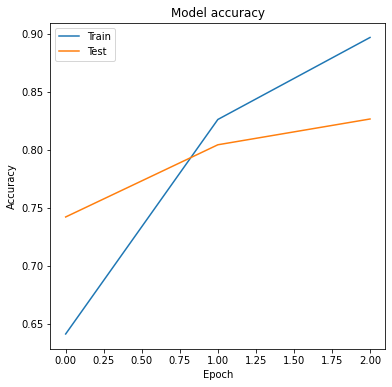

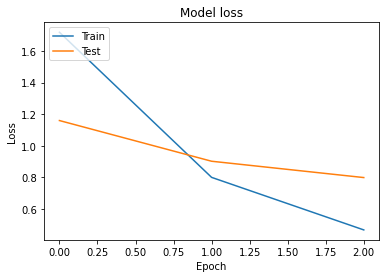

In [ ]:
plt.figure(figsize=(6, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

print()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

<br/>

In [ ]:
max_words = 9670
num_classes = 46

ten_tfidfv_train_arr = ten_tfidfv_train.toarray()
ten_tfidfv_test_arr = ten_tfidfv_test.toarray()
ten_y_train_catetory = keras.utils.to_categorical(ten_y_train, num_classes)
ten_y_test_catetory = keras.utils.to_categorical(ten_y_test, num_classes)

with tf.device('/device:GPU:0'):
  model = Sequential()
  model.add(Dense(512, input_shape=(max_words,)))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes))
  model.add(Activation('softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  ['loss', 'acc']

  batch_size = 32
  epochs = 3
  
  history = model.fit(ten_tfidfv_train_arr, ten_y_train_catetory, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.1)
  ten_dnn_score = model.evaluate(ten_tfidfv_test_arr, ten_y_test_catetory, batch_size=batch_size, verbose=1)

  print()
  print('Test loss:', ten_dnn_score[0])
  print('Test accuracy:', ten_dnn_score[1])

Epoch 1/3
253/253 [==============================] - 1s 5ms/step - loss: 1.6819 - accuracy: 0.6426 - val_loss: 1.1365 - val_accuracy: 0.7430
Epoch 2/3
253/253 [==============================] - 1s 4ms/step - loss: 0.8068 - accuracy: 0.8173 - val_loss: 0.8799 - val_accuracy: 0.8065
Epoch 3/3
71/71 [==============================] - 0s 3ms/step - loss: 0.7549 - accuracy: 0.8143

Test loss: 0.7549293041229248
Test accuracy: 0.8143365979194641


num_words=10000일 때, DNN  모델의 성능 'accuracy'는 81.43%이다.

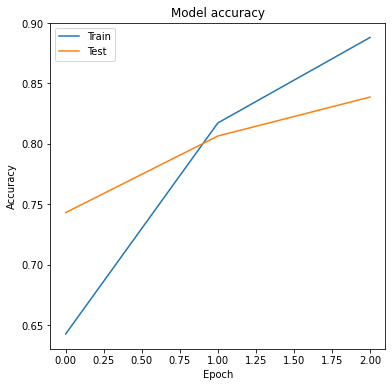

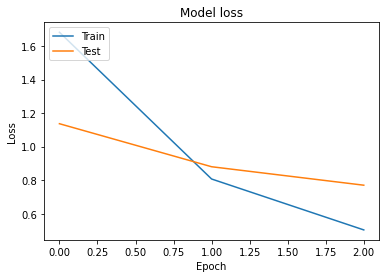

In [ ]:
plt.figure(figsize=(6, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

print()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

<br/>

In [ ]:
max_words = 4867
num_classes = 46

five_tfidfv_train_arr = five_tfidfv_train.toarray()
five_tfidfv_test_arr = five_tfidfv_test.toarray()
five_y_train_catetory = keras.utils.to_categorical(five_y_train, num_classes)
five_y_test_catetory = keras.utils.to_categorical(five_y_test, num_classes)

with tf.device('/device:GPU:0'):
  model = Sequential()
  model.add(Dense(512, input_shape=(max_words,)))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes))
  model.add(Activation('softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  ['loss', 'acc']

  batch_size = 32
  epochs = 3
  
  history = model.fit(five_tfidfv_train_arr, five_y_train_catetory, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.1)
  five_dnn_score = model.evaluate(five_tfidfv_test_arr, five_y_test_catetory, batch_size=batch_size, verbose=1)

  print()
  print('Test loss:', five_dnn_score[0])
  print('Test accuracy:', five_dnn_score[1])

Epoch 1/3
253/253 [==============================] - 1s 4ms/step - loss: 1.6782 - accuracy: 0.6327 - val_loss: 1.1482 - val_accuracy: 0.7475
Epoch 2/3
253/253 [==============================] - 1s 3ms/step - loss: 0.8408 - accuracy: 0.8126 - val_loss: 0.8986 - val_accuracy: 0.7998
Epoch 3/3
71/71 [==============================] - 0s 3ms/step - loss: 0.7607 - accuracy: 0.8157

Test loss: 0.7606613039970398
Test accuracy: 0.8156722784042358


num_words=5000일 때, DNN 모델의 성능 'accuracy'는 81.57%이다.

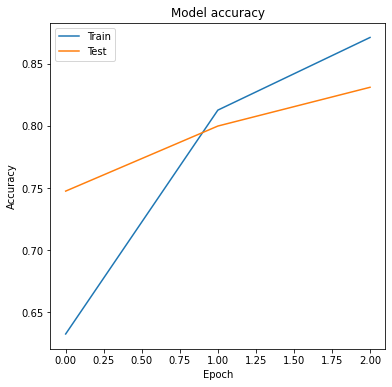

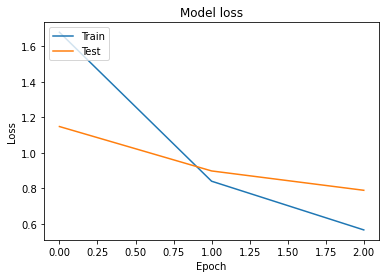

In [ ]:
plt.figure(figsize=(6, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

print()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

<br/>

In [ ]:
max_words = 4867
num_classes = 46

one_tfidfv_train_arr = one_tfidfv_train.toarray()
one_tfidfv_test_arr = one_tfidfv_test.toarray()
one_y_train_catetory = keras.utils.to_categorical(one_y_train, num_classes)
one_y_test_catetory = keras.utils.to_categorical(one_y_test, num_classes)

with tf.device('/device:GPU:0'):
  model = Sequential()
  model.add(Dense(512, input_shape=(max_words,)))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes))
  model.add(Activation('softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  ['loss', 'acc']

  batch_size = 32
  epochs = 3
  
  history = model.fit(one_tfidfv_train_arr, one_y_train_catetory, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.1)
  one_dnn_score = model.evaluate(one_tfidfv_test_arr, one_y_test_catetory, batch_size=batch_size, verbose=1)

  print()
  print('Test loss:', one_dnn_score[0])
  print('Test accuracy:', one_dnn_score[1])

Epoch 1/3
253/253 [==============================] - 1s 4ms/step - loss: 1.6749 - accuracy: 0.6376 - val_loss: 1.1523 - val_accuracy: 0.7475
Epoch 2/3
253/253 [==============================] - 1s 3ms/step - loss: 0.8438 - accuracy: 0.8128 - val_loss: 0.8965 - val_accuracy: 0.8009
Epoch 3/3
71/71 [==============================] - 0s 2ms/step - loss: 0.7622 - accuracy: 0.8139

Test loss: 0.7621806263923645
Test accuracy: 0.8138913512229919


num_words=1000일 때, DNN  모델의 성능 'accuracy'는 81.39%이다.

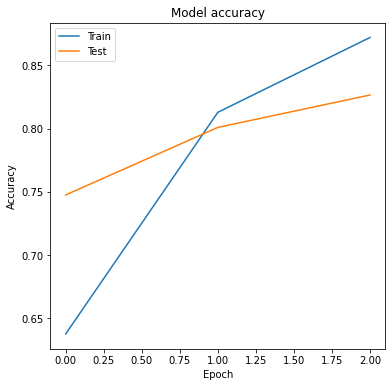

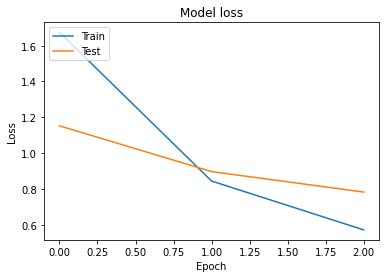

In [ ]:
plt.figure(figsize=(6, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

print()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

<br/>

In [ ]:
dnn_model_comparison = [round(none_dnn_score[1], 4), round(ten_dnn_score[1], 4),
                        round(five_dnn_score[1], 4), round(one_dnn_score[1], 4)]

dnn_model_name = ['dnn_none', 'dnn_10000', 'dnn_5000', 'dnn_1000']

dnn_df = pd.DataFrame({"Model": dnn_model_name,
                  "Accuracy":dnn_model_comparison})
dnn_df_sorted = dnn_df.sort_values('Accuracy',ascending=False)
dnn_df_sorted

,Model,Accuracy
0,dnn_none,0.8161
2,dnn_5000,0.8157
1,dnn_10000,0.8143
3,dnn_1000,0.8139


DNN 모델의 성능은 num_words에 큰 영향을 받지 않는다.

<br/>

##1-D CNN

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 128, input_length=text_max_words))
model.add(Dropout(0.2))
model.add(Conv1D(256, 3, padding='valid', activation='relu', strides=1))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(46, activation='softmax'))
model.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_28 (Embedding)    (None, 120, 128)          3965312   
                                                                 
 dropout_62 (Dropout)        (None, 120, 128)          0         
                                                                 
 conv1d_28 (Conv1D)          (None, 118, 256)          98560     
                                                                 
 global_max_pooling1d_28 (Gl  (None, 256)              0         
 obalMaxPooling1D)                                               
                                                                 
 dense_68 (Dense)            (None, 128)               32896     
                                                                 
 dropout_63 (Dropout)        (None, 128)               0         
                                                     

<br/><br/>



```
x_train_seq = sequence.pad_sequences(x_train, maxlen = text_max_words)
x_test_seq = sequence.pad_sequences(x_test, maxlen = text_max_words)
y_train_catetory = np_utils.to_categorical(y_train)
y_test_catetory = np_utils.to_categorical(y_test)
```



1-D CNN 모델에 사용한 데이터의 형태는 Two-Dimensional Tensor(X, Feature)와 Binary Class Matrix(Y, Target)이다.
<br/>sequence.pad_sequences는 병렬 연산을 위해 Two-Dimensional Tensor의 길이를 맞춘다.
<br/>np_utils.to_categorical는 Integer Vector를 Binary Class Matrix로 변환한다.

<br/><br/>

In [ ]:
(none_x_train, none_y_train), (none_x_test, none_y_test) = reuters.load_data(num_words=None, test_split=0.2)

vocab_size = len(word_index)
text_max_words = 120

none_x_train_seq = sequence.pad_sequences(none_x_train, maxlen = text_max_words)
none_x_test_seq = sequence.pad_sequences(none_x_test, maxlen = text_max_words)
none_y_train_catetory = np_utils.to_categorical(none_y_train)
none_y_test_catetory = np_utils.to_categorical(none_y_test)

model = Sequential()
model.add(Embedding(vocab_size, 128, input_length=text_max_words))
model.add(Dropout(0.2))
model.add(Conv1D(256, 3, padding='valid', activation='relu', strides=1))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(46, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(none_x_train_seq, none_y_train_catetory, epochs=10, batch_size=256, validation_split=0.1)
none_cnn_score = model.evaluate(none_x_test_seq, none_y_test_catetory, batch_size=256, verbose=1)
  
print()
print('Test loss:', none_cnn_score[0])
print('Test accuracy:', none_cnn_score[1])

Epoch 1/10
32/32 [==============================] - 2s 31ms/step - loss: 2.8512 - accuracy: 0.3549 - val_loss: 2.1510 - val_accuracy: 0.4638
Epoch 2/10
32/32 [==============================] - 0s 15ms/step - loss: 1.9908 - accuracy: 0.5006 - val_loss: 1.9009 - val_accuracy: 0.5050
Epoch 3/10
32/32 [==============================] - 0s 15ms/step - loss: 1.7478 - accuracy: 0.5514 - val_loss: 1.6373 - val_accuracy: 0.6240
Epoch 4/10
32/32 [==============================] - 0s 15ms/step - loss: 1.4741 - accuracy: 0.6571 - val_loss: 1.4072 - val_accuracy: 0.6830
Epoch 5/10
32/32 [==============================] - 0s 15ms/step - loss: 1.2759 - accuracy: 0.6950 - val_loss: 1.3117 - val_accuracy: 0.6885
Epoch 6/10
32/32 [==============================] - 0s 15ms/step - loss: 1.1159 - accuracy: 0.7320 - val_loss: 1.2373 - val_accuracy: 0.7208
Epoch 7/10
32/32 [==============================] - 0s 15ms/step - loss: 0.9412 - accuracy: 0.7752 - val_loss: 1.1803 - val_accuracy: 0.7241
Epoch 8/10
32

num_words=none일 때, CNN 모델의 성능 'accuracy'는 72.75%이다.

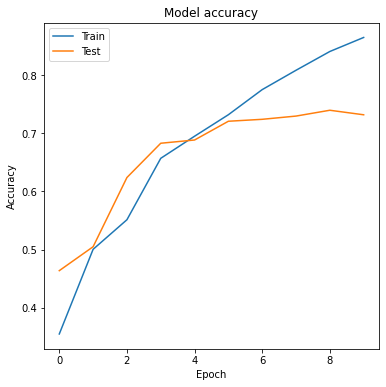

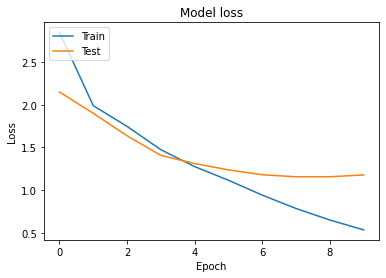

In [ ]:
plt.figure(figsize=(6, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

print()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

<br/>

In [ ]:
(ten_x_train, ten_y_train), (ten_x_test, ten_y_test) = reuters.load_data(num_words=10000, test_split=0.2)

vocab_size = 10000
text_max_words = 120

ten_x_train_seq = sequence.pad_sequences(ten_x_train, maxlen = text_max_words)
ten_x_test_seq = sequence.pad_sequences(ten_x_test, maxlen = text_max_words)
ten_y_train_catetory = np_utils.to_categorical(ten_y_train)
ten_y_test_catetory = np_utils.to_categorical(ten_y_test)

model = Sequential()
model.add(Embedding(vocab_size, 128, input_length=text_max_words))
model.add(Dropout(0.2))
model.add(Conv1D(256, 3, padding='valid', activation='relu', strides=1))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(46, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(ten_x_train_seq, ten_y_train_catetory, epochs=10, batch_size=256, validation_split=0.1)
ten_cnn_score = model.evaluate(ten_x_test_seq, ten_y_test_catetory, batch_size=256, verbose=1)
  
print()
print('Test loss:', ten_cnn_score[0])
print('Test accuracy:', ten_cnn_score[1])

Epoch 1/10
32/32 [==============================] - 1s 21ms/step - loss: 2.8199 - accuracy: 0.3561 - val_loss: 2.1866 - val_accuracy: 0.4661
Epoch 2/10
32/32 [==============================] - 0s 14ms/step - loss: 2.0075 - accuracy: 0.4961 - val_loss: 1.9116 - val_accuracy: 0.5017
Epoch 3/10
32/32 [==============================] - 0s 14ms/step - loss: 1.7544 - accuracy: 0.5554 - val_loss: 1.6410 - val_accuracy: 0.6429
Epoch 4/10
32/32 [==============================] - 0s 14ms/step - loss: 1.4790 - accuracy: 0.6619 - val_loss: 1.4227 - val_accuracy: 0.6841
Epoch 5/10
32/32 [==============================] - 0s 14ms/step - loss: 1.2827 - accuracy: 0.7006 - val_loss: 1.3267 - val_accuracy: 0.7008
Epoch 6/10
32/32 [==============================] - 0s 14ms/step - loss: 1.1304 - accuracy: 0.7325 - val_loss: 1.2578 - val_accuracy: 0.7141
Epoch 7/10
32/32 [==============================] - 0s 14ms/step - loss: 0.9966 - accuracy: 0.7565 - val_loss: 1.2199 - val_accuracy: 0.7152
Epoch 8/10
32

num_words=10000일 때, CNN  모델의 성능 'accuracy'는 73.95%이다.

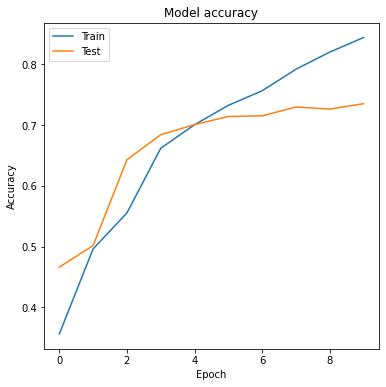

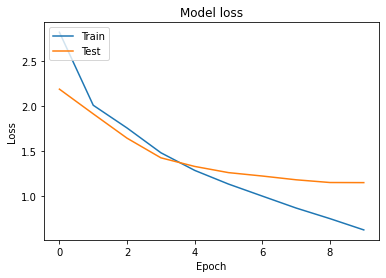

In [ ]:
plt.figure(figsize=(6, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

print()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

<br/>

In [ ]:
(five_x_train, five_y_train), (five_x_test, five_y_test) = reuters.load_data(num_words=5000, test_split=0.2)

vocab_size = 5000
text_max_words = 120

five_x_train_seq = sequence.pad_sequences(five_x_train, maxlen = text_max_words)
five_x_test_seq = sequence.pad_sequences(five_x_test, maxlen = text_max_words)
five_y_train_catetory = np_utils.to_categorical(five_y_train)
five_y_test_catetory = np_utils.to_categorical(five_y_test)

model = Sequential()
model.add(Embedding(vocab_size, 128, input_length=text_max_words))
model.add(Dropout(0.2))
model.add(Conv1D(256, 3, padding='valid', activation='relu', strides=1))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(46, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(five_x_train_seq, five_y_train_catetory, epochs=10, batch_size=256, validation_split=0.1)
five_cnn_score = model.evaluate(five_x_test_seq, five_y_test_catetory, batch_size=256, verbose=1)
  
print()
print('Test loss:', five_cnn_score[0])
print('Test accuracy:', five_cnn_score[1])

Epoch 1/10
32/32 [==============================] - 1s 21ms/step - loss: 2.8176 - accuracy: 0.3656 - val_loss: 2.1493 - val_accuracy: 0.4839
Epoch 2/10
32/32 [==============================] - 0s 14ms/step - loss: 1.9699 - accuracy: 0.5009 - val_loss: 1.8737 - val_accuracy: 0.5017
Epoch 3/10
32/32 [==============================] - 0s 14ms/step - loss: 1.7273 - accuracy: 0.5656 - val_loss: 1.6488 - val_accuracy: 0.6129
Epoch 4/10
32/32 [==============================] - 0s 14ms/step - loss: 1.4998 - accuracy: 0.6512 - val_loss: 1.4467 - val_accuracy: 0.6741
Epoch 5/10
32/32 [==============================] - 0s 14ms/step - loss: 1.3002 - accuracy: 0.6939 - val_loss: 1.3288 - val_accuracy: 0.6974
Epoch 6/10
32/32 [==============================] - 0s 14ms/step - loss: 1.1445 - accuracy: 0.7270 - val_loss: 1.2386 - val_accuracy: 0.7186
Epoch 7/10
32/32 [==============================] - 0s 14ms/step - loss: 1.0015 - accuracy: 0.7590 - val_loss: 1.1855 - val_accuracy: 0.7286
Epoch 8/10
32

num_words=5000일 때, CNN 모델의 성능 'accuracy'는 74.40%이다.

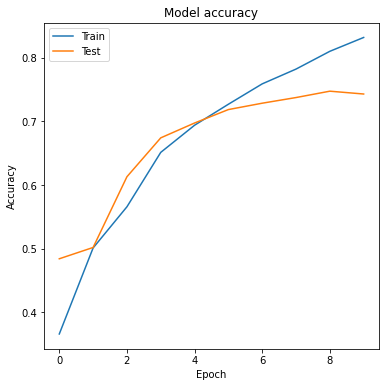

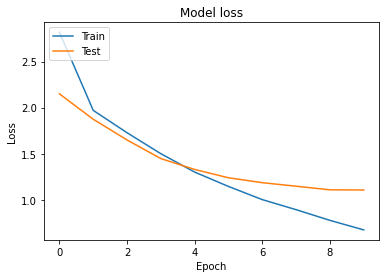

In [ ]:
plt.figure(figsize=(6, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

print()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

<br/>

In [ ]:
(one_x_train, one_y_train), (one_x_test, one_y_test) = reuters.load_data(num_words=1000, test_split=0.2)

vocab_size = 1000
text_max_words = 120

one_x_train_seq = sequence.pad_sequences(one_x_train, maxlen = text_max_words)
one_x_test_seq = sequence.pad_sequences(one_x_test, maxlen = text_max_words)
one_y_train_catetory = np_utils.to_categorical(one_y_train)
one_y_test_catetory = np_utils.to_categorical(one_y_test)

model = Sequential()
model.add(Embedding(vocab_size, 128, input_length=text_max_words))
model.add(Dropout(0.2))
model.add(Conv1D(256, 3, padding='valid', activation='relu', strides=1))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(46, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(one_x_train_seq, one_y_train_catetory, epochs=10, batch_size=256, validation_split=0.1)
one_cnn_score = model.evaluate(one_x_test_seq, one_y_test_catetory, batch_size=256, verbose=1)
  
print()
print('Test loss:', one_cnn_score[0])
print('Test accuracy:', one_cnn_score[1])

Epoch 1/10
32/32 [==============================] - 2s 29ms/step - loss: 2.9107 - accuracy: 0.3609 - val_loss: 2.1943 - val_accuracy: 0.4894
Epoch 2/10
32/32 [==============================] - 0s 13ms/step - loss: 2.0021 - accuracy: 0.4971 - val_loss: 1.8782 - val_accuracy: 0.5006
Epoch 3/10
32/32 [==============================] - 0s 13ms/step - loss: 1.7399 - accuracy: 0.5601 - val_loss: 1.6474 - val_accuracy: 0.5996
Epoch 4/10
32/32 [==============================] - 0s 13ms/step - loss: 1.5061 - accuracy: 0.6480 - val_loss: 1.4477 - val_accuracy: 0.6796
Epoch 5/10
32/32 [==============================] - 0s 13ms/step - loss: 1.3483 - accuracy: 0.6823 - val_loss: 1.3581 - val_accuracy: 0.6874
Epoch 6/10
32/32 [==============================] - 0s 13ms/step - loss: 1.2441 - accuracy: 0.7023 - val_loss: 1.3029 - val_accuracy: 0.6986
Epoch 7/10
32/32 [==============================] - 0s 13ms/step - loss: 1.1506 - accuracy: 0.7173 - val_loss: 1.2477 - val_accuracy: 0.7041
Epoch 8/10
32

num_words=1000일 때, CNN 모델의 성능 'accuracy'는 74.09%이다.

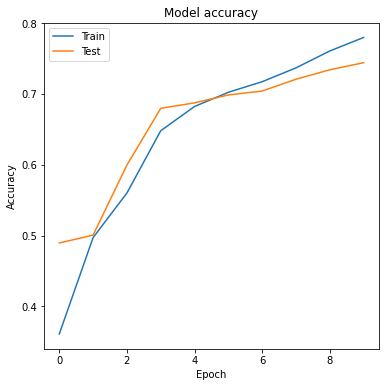

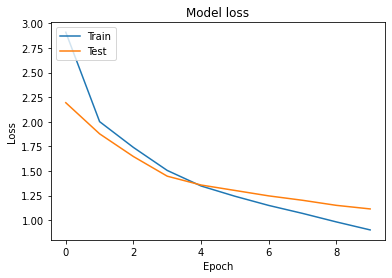

In [ ]:
plt.figure(figsize=(6, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

print()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

<br/>

In [ ]:
cnn_model_comparison = [round(none_cnn_score[1], 4), round(ten_cnn_score[1], 4),
                        round(five_cnn_score[1], 4), round(one_cnn_score[1], 4)]

cnn_model_name = ['cnn_none', 'cnn_10000', 'cnn_5000', 'cnn_1000']

cnn_df = pd.DataFrame({"Model": cnn_model_name,
                  "Accuracy":cnn_model_comparison})
cnn_df_sorted = cnn_df.sort_values('Accuracy',ascending=False)
cnn_df_sorted

,Model,Accuracy
2,cnn_5000,0.7440
3,cnn_1000,0.7409
1,cnn_10000,0.7395
0,cnn_none,0.7275


num_words=n에서 n이 작을수록 CNN  모델의 성능이 대체로 높은 편이다.

<br/>

#모델 평가

##Model Performance

In [ ]:
machinelearning_model_df_list = [mnb_df, cnb_df, lr_df, passiveagre_df, ridge_df, sgd_df,
                 lsvc_df, rbf_svc_df, poly_svc_df, tree_df, extree_df, forest_df,
                 adabt_df, grbt_df, xgb_df, lgbm_df, catbt_df, bagging_df, voting_df,
                 kneigh_df, mlp_df, dummy_df]

machinelearning_model_df = pd.concat(machinelearning_model_df_list, ignore_index=True)
machinelearning_model_df_sorted = machinelearning_model_df.sort_values('Accuracy',ascending=False)
machinelearning_model_df_sorted['Rank'] = machinelearning_model_df_sorted.reset_index().index + 1

<br/>

Top Machine Learning Algorithm

Multiclass Text Classification Test Accuracy 기준으로 상위 20위 안에 드는 머신러닝 알고리즘이다.

In [ ]:
machinelearning_model_df_sorted[:20]

,Model,Accuracy,Rank
20,sgd_none,0.8442,1
21,sgd_10000,0.8411,2
23,sgd_1000,0.8406,3
22,sgd_5000,0.8406,4
16,ridge_none,0.8393,5
17,ridge_10000,0.8393,6
19,ridge_1000,0.8379,7
18,ridge_5000,0.8379,8
72,voting_none,0.8183,9
74,voting_5000,0.8161,10


<br/><br/>

Bottom Machine Learning Algorithm

Multiclass Text Classification Test Accuracy 기준으로 하위 20위 안에 드는 머신러닝 알고리즘이다.

In [ ]:
machinelearning_model_df_sorted[-20:]

,Model,Accuracy,Rank
38,tree_5000,0.6180,69
64,catbt_none,0.6153,70
65,catbt_10000,0.6086,71
0,mnb_none,0.5997,72
43,extree_1000,0.5632,73
67,catbt_1000,0.5574,74
33,poly_svc_10000,0.5516,75
35,poly_svc_1000,0.5410,76
34,poly_svc_5000,0.5410,77
41,extree_10000,0.5258,78


<br/><br/>

Deep Learning Algorithm

In [ ]:
deeplearning_model_df_list = [dnn_df, cnn_df]

deeplearning_model_df = pd.concat(deeplearning_model_df_list, ignore_index=True)
deeplearning_model_df_sorted = deeplearning_model_df.sort_values('Accuracy',ascending=False)
deeplearning_model_df_sorted['Rank'] = deeplearning_model_df_sorted.reset_index().index + 1
deeplearning_model_df_sorted

,Model,Accuracy,Rank
0,dnn_none,0.8161,1
2,dnn_5000,0.8157,2
1,dnn_10000,0.8143,3
3,dnn_1000,0.8139,4
6,cnn_5000,0.7440,5
7,cnn_1000,0.7409,6
5,cnn_10000,0.7395,7
4,cnn_none,0.7275,8


<br/><br/>

Deep Learning Algorithm Rank in Maching Learning Algorithm

In [ ]:
model_df = pd.concat([machinelearning_model_df_sorted, deeplearning_model_df_sorted])
model_df_sorted = model_df.sort_values('Accuracy',ascending=False)
model_df_sorted['Rank'] = model_df_sorted.reset_index().index + 1
dnn_model_df_sorted = model_df_sorted[model_df_sorted['Model'].str.contains('dnn')]
cnn_model_df_sorted = model_df_sorted[model_df_sorted['Model'].str.contains('cnn')]
deep_learning_model_df_sorted2 = pd.concat([dnn_model_df_sorted, cnn_model_df_sorted])
deep_learning_model_df_sorted2 = deep_learning_model_df_sorted2.sort_values('Accuracy',ascending=False)
deep_learning_model_df_sorted2

,Model,Accuracy,Rank
0,dnn_none,0.8161,10
2,dnn_5000,0.8157,13
1,dnn_10000,0.8143,15
3,dnn_1000,0.8139,16
6,cnn_5000,0.7440,54
7,cnn_1000,0.7409,55
5,cnn_10000,0.7395,56
4,cnn_none,0.7275,57


머신러닝 알고리즘 정확도와 딥러닝 알고리즘 정확도 데이터프레임을 병합한다.
<br/>데이터프레임의 Rank는 Multiclass Text Classification Test Accuracy를 기준으로 한다.
<br/>그 중에서 DNN과 CNN 모델의 성능 순위가 어떻게 되는지 파악한다.

DNN 모델의 성능은 Maching Learning Algorithm 사이에서 10위권(80%대)이다.
<br/>CNN 모델의 성능은 Maching Learning Algorithm 사이에서 50위권(70%대)이다.

<br/>

##Vocabulary Size

In [ ]:
none_accuracy_list = [none_mnb_accuracy, none_cnb_accuracy, none_lr_accuracy, 
                        none_passiveagre_accuracy, none_ridge_accuracy, none_sgd_accuracy,
                 none_lsvc_accuracy, none_rbf_svc_accuracy, none_poly_svc_accuracy,  
                 none_tree_accuracy,none_extree_accuracy, none_forest_accuracy,
                 none_adabt_accuracy, none_grbt_accuracy, 
                 none_xgb_accuracy, none_lgbm_accuracy, none_catbt_accuracy,
                 none_bagging_accuracy, none_voting_accuracy,
                 none_kneigh_accuracy, none_mlp_accuracy, none_dummy_accuracy]

ten_accuracy_list = [ten_mnb_accuracy, ten_cnb_accuracy, ten_lr_accuracy, 
                        ten_passiveagre_accuracy, ten_ridge_accuracy, ten_sgd_accuracy,
                 ten_lsvc_accuracy, ten_rbf_svc_accuracy, ten_poly_svc_accuracy,  
                 ten_tree_accuracy,ten_extree_accuracy, ten_forest_accuracy,
                 ten_adabt_accuracy, ten_grbt_accuracy, 
                 ten_xgb_accuracy, ten_lgbm_accuracy, ten_catbt_accuracy,
                 ten_bagging_accuracy, ten_voting_accuracy,
                 ten_kneigh_accuracy, ten_mlp_accuracy, ten_dummy_accuracy]

five_accuracy_list = [five_mnb_accuracy, five_cnb_accuracy, five_lr_accuracy, 
                        five_passiveagre_accuracy, five_ridge_accuracy, five_sgd_accuracy,
                 five_lsvc_accuracy, five_rbf_svc_accuracy, five_poly_svc_accuracy,  
                 five_tree_accuracy,five_extree_accuracy, five_forest_accuracy,
                 five_adabt_accuracy, five_grbt_accuracy,
                 five_xgb_accuracy, five_lgbm_accuracy, five_catbt_accuracy,
                 five_bagging_accuracy, five_voting_accuracy,
                 five_kneigh_accuracy, five_mlp_accuracy, five_dummy_accuracy]

one_accuracy_list = [one_mnb_accuracy, one_cnb_accuracy, one_lr_accuracy, 
                        one_passiveagre_accuracy, one_ridge_accuracy, one_sgd_accuracy,
                 one_lsvc_accuracy, one_rbf_svc_accuracy, one_poly_svc_accuracy,  
                 one_tree_accuracy,one_extree_accuracy, one_forest_accuracy,
                 one_adabt_accuracy, one_grbt_accuracy, 
                 one_xgb_accuracy, one_lgbm_accuracy, one_catbt_accuracy,
                 one_bagging_accuracy, one_voting_accuracy,
                 one_kneigh_accuracy, one_mlp_accuracy, one_dummy_accuracy]

In [ ]:
none_accuracy_avg = np.mean(none_accuracy_list)
ten_accuracy_avg = np.mean(ten_accuracy_list)
five_accuracy_avg = np.mean(five_accuracy_list)
one_accuracy_avg = np.mean(one_accuracy_list)

vocab_size_comparison = [round(none_accuracy_avg, 4), round(ten_accuracy_avg, 4),
                        round(five_accuracy_avg, 4), round(one_accuracy_avg, 4)]


vocab_size = ['none', '10000', '5000', '1000']

vocab_size_df = pd.DataFrame({"num_words = n": vocab_size,
                  "Accuracy":vocab_size_comparison})
vocab_size_df_sorted = vocab_size_df.sort_values('Accuracy',ascending=False)
vocab_size_df_sorted

,num_words = n,Accuracy
2,5000,0.7168
3,1000,0.7023
1,10000,0.7014
0,none,0.6883


빈도수 상위 5000개, 1000개, 10000개, 모든 단어의 데이터를 사용한 모델 순으로 성능이 높다.

<br/>

#결론

**머신 러닝 알고리즘**

[scikit-learn 1.1.1](https://scikit-learn.org/stable/modules/classes.html)에서 제공하는 머신러닝 다중 분류 알고리즘을 사용하는 것이 이번 프로젝트의 목표이다.
<br/>로이터 뉴스 데이터에는 다중 분류 알고리즘을 사용하는 것이 적절하다.

<br/>

모델 구현에 실패한 다중 분류 알고리즘

실패 원인 &emsp;&emsp;&emsp;&ensp; |&emsp;모델
<br/>오랜 작업시간 &emsp;&ensp; |&emsp;StackingClassifier, HistGradientBoostingClassifier, GaussianProcessClassifier
<br/>메모리 용량&emsp;&emsp;&ensp;&nbsp; |&emsp;AdalineSGDClassifer
<br/>데이터 전처리&emsp;&emsp;|&emsp;RadiusNeighborsClassifier, NuSVC
<br/>낮은 성능&emsp;&emsp;&emsp;&emsp;|&emsp;AdalineGDClassifer

사이킷런 라이브러리 공부의 깊이가 더 깊어지면 모델 구현의 실패 원인을 해결하여 다중 분류 알고리즘을 작동시킨다.

<br/>

다음에 구현하고 싶은 다중 분류 알고리즘

유형&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;|&emsp;모델
<br/>Cross Validation&emsp; |&emsp;KFold, LeaveOneOut, ShuffleSplit
<br/>Grid Search&emsp;&emsp;&emsp;&nbsp;|&emsp;GridSearchCV, RandomizedSearchCV
<br/>Pipeline&emsp;&emsp;&emsp;&emsp;&ensp; |&emsp;Pipeline, Make_pipeline
<br/>AutoML&emsp;&emsp;&emsp;&emsp;&ensp; |&emsp;PyCaret
<br/>etc &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&ensp; |&emsp;BaseEstimator, ClassifierMixin, CalibratedClassifierCV, IsolationForest
<br/>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; |&emsp;OneVsRestClassifier, ClassifierChain, MultiOutputClassifier, SelfTrainingClassifier
<br/>Visualization&emsp;&emsp;&ensp;&nbsp;|&emsp;ROC Curve, PR Curve, AUC

사이킷런 라이브러리 공부의 깊이가 더 깊어지면 다음에 구현하고 싶은 다중 분류  알고리즘이 있다.
<br/>Multiclass_TextClassification_Sklearn.ipynb라는 파일 이름으로 깃허브에 코드를 올릴 예정이다.

<br/>

Top Machine Learning Algorithm

Linear classifier &emsp;&emsp;&emsp;&ensp;&ensp;&nbsp;&nbsp; | &ensp;SGD Classifier, Ridge Classifier, Passive Aggressive Classifier, Logistic Regression
<br/>Ensemble Method &emsp;&emsp;&emsp;&nbsp; | &ensp;Voting Classifier
<br/>Neural network model &emsp;&ensp; | &ensp;MLP Classifier
<br/>Support Vector Machine &emsp;| &ensp;Radial Basis Function SVC

Multiclass Text Classification Test Accuracy 기준으로 상위 20위 안에 드는 머신러닝 알고리즘이다.

<br/>

Bottom Machine Learning Algorithm

Dummy Classifier
<br/>Support Vector Machine &emsp; | &ensp;Polynomial SVC
<br/>Ensemble Method &emsp;&emsp;&emsp;&emsp;| &ensp;AdaBoost Classifier, CatBoost Classifier
<br/>Decision Tree &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;| &ensp;Decision Tree Classifier, ExtraTrees Classifier
<br/>Naive Bayes Classifier&emsp;&emsp;&ensp; | &ensp;Multinomial Naive Bayes Classifier(MNB)

Multiclass Text Classification Test Accuracy 기준으로 하위 20위 안에 드는 머신러닝 알고리즘이다.

<br/><br/>

**딥러닝 알고리즘**

머신러닝 알고리즘 정확도와 딥러닝 알고리즘 정확도 데이터프레임을 병합한다.
<br/>데이터프레임의 Rank는 Multiclass Text Classification Test Accuracy를 기준으로 한다.
<br/>그 중에서 DNN과 CNN 모델의 성능 순위가 어떻게 되는지 파악한다.

DNN 모델의 성능은 Maching Learning Algorithm 사이에서 10위권(80%대)이다.
<br/>CNN 모델의 성능은 Maching Learning Algorithm 사이에서 50위권(70%대)이다.

데이터 형태의 차이가 모델의 성능에 영향을 주었는가에 대해 공부할 필요성을 느낀다.

DNN 모델에 사용한 데이터의 형태는 Dense Array(X, Feature) 와 Multiclass Matrix(Y, Target)이다.
<br/>csr_matrix.toarray는 TF-IDF Matrix(CSR Matrix)를 Dense Array로 변환한다.
<br/>utils.to_categorical는 Integer Vector를 Binary Class Matrix로 변환한다.

1-D CNN 모델에 사용한 데이터의 형태는 Two-Dimensional Tensor(X, Feature)와 Binary Class Matrix(Y, Target)이다.
<br/>sequence.pad_sequences는 병렬 연산을 위해 Two-Dimensional Tensor의 길이를 맞춘다.
<br/>np_utils.to_categorical는 Integer Vector를 Binary Class Matrix로 변환한다.

<br/><br/>

#참고문헌

**LMS**
<br/>[ukairia777](https://github.com/ukairia777)

<br/>**단행본**
<br/>김태영, 『블록과 함께 하는 파이썬 딥러닝 케라스』, 디지털북스, 2017
<br/>[문장(시계열수치)입력 다중클래스분류 모델 레시피](https://tykimos.github.io/2017/08/17/Text_Input_Multiclass_Classification_Model_Recipe/)
<br/><br/>유원준 외 1명, 『딥러닝을 이용한 자연어 처리 입문』,Wikidocs, 2022
<br/>[로이터 뉴스 분류하기(Reuters News Classification)](https://wikidocs.net/22933)
<br/>[패딩(Padding)](https://wikidocs.net/83544)
<br/><br/>크리슨 알본, 『파이썬을 활용한 머신러닝 쿡북』, 박해선 옮긴이, 한빛미디어, 2019
<br/>[벡터, 행렬, 배열](https://haaringa.tistory.com/entry/1-%EB%B2%A1%ED%84%B0-%ED%96%89%EB%A0%AC-%EB%B0%B0%EC%97%B4)

<br/>**공식 사이트**
<br/>daviddlewis.com
<br/>[Reuters-21578 Text Categorization Collection](https://kdd.ics.uci.edu/databases/reuters21578/reuters21578.html)
<br/><br/>Google Colab
<br/>[TensorFlow with GPU](https://colab.research.google.com/notebooks/gpu.ipynb?hl=ko#scrollTo=tMce8muBqXQP)
<br/><br/>네이버 지식백과
<br/>[두산백과 통신사](http://terms.naver.com/entry.naver?docId=1153392&cid=40942&categoryId=31754)
<br/><br/>Scikit-learn
<br/>[scikit-learn 1.1.1 API Reference](https://scikit-learn.org/stable/modules/classes.html)
<br/><br/>Tensorflow
<br/>[tf.keras.utils.to_categorical](https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical)

<br/>**깃허브**
<br/>[Going Deeper NLP 04 DTM, TF-IDF Vocabulary Size실험](https://github.com/miinkang/AI_Project_AIFFEL/blob/main/%5BGD-04%5DTFIDF_vectorization.ipynb)
<br/>[ValueError: WRITEBACKIFCOPY base is read-only #1](https://github.com/nishantml/STACKOVERFLOW-TAG-PREDICTOR/issues/1)

<br/>**웹사이트**
<br/>[구글 코랩(colab) GPU 딥러닝 케라스(keras) 돌리기 추가.CPU랑 속도 비교](https://blog.naver.com/PostView.nhn?blogId=demian7607&logNo=222043724449&from=search&redirect=Log&widgetTypeCall=true&directAccess=false)
<br/>[Tensorflow 텐서플로우 GPU로 실행하도록 설정하는 방법](https://otugi.tistory.com/330)
<br/>[한국언론진흥재단 미디어리터러시 AP, 로이터, 연합뉴스... 통신사와 신문사의 차이는?](https://dadoc.or.kr/1276)
<br/>[Python SVM(Support Vector Machine)구현 실습](https://todayisbetterthanyesterday.tistory.com/32)
<br/>[My ExtraTreesClassifier](https://jin-sang.github.io/ExtraTree/)
<br/>[How to increase accuracy of model using catboost](https://stackoverflow.com/questions/60648547/how-to-increase-accuracy-of-model-using-catboost)
<br/>[A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array](https://stackoverflow.com/questions/30502284/a-sparse-matrix-was-passed-but-dense-data-is-required-use-x-toarray-to-conve)
<br/>[0311 - 모델 평가 (교차검증 모델 / DummyClassifer)](https://ivo-lee.tistory.com/94)
<br/>[Text Classification in Keras (Part 1) — A Simple Reuters News Classifier](http://hunterheidenreich.com/blog/keras-text-classification-part-1/)
<br/>[Keras Study 6장. 텍스트와 시퀀스를 위한 딥러닝 (1)](https://subinium.github.io/Keras-6-1/)
<br/>[변수 Feature VS Target, Feture Engineering](https://seeyapangpang.tistory.com/11)


<br/>**공부**
<br/>[LSTM을 이용해 로이터 뉴스 카테고리 분석하기](https://buillee.tistory.com/146)
<br/>[sklearn Pipeline을 이용해 다양한 Classification모델들 모델링하기](https://data-newbie.tistory.com/185)
<br/>[자연어처리(NLP) 17일차 (로이터 뉴스 분류하기)](https://omicro03.medium.com/%EC%9E%90%EC%97%B0%EC%96%B4%EC%B2%98%EB%A6%AC-nlp-17%EC%9D%BC%EC%B0%A8-%EB%A1%9C%EC%9D%B4%ED%84%B0-%EB%89%B4%EC%8A%A4-%EB%B6%84%EB%A5%98%ED%95%98%EA%B8%B0-f5466abe9196)
<br/>[sklearn을 사용한 SVM 분류](https://liveyourit.tistory.com/62)
<br/>[CNN 모델 구현코드의 기본 형태를 알아보자(with Keras)](https://aidalab.tistory.com/77)
<br/><br/>세바스찬 라시카, 바히드 미자리리, 『머신 러닝 교과서 with 파이썬, 사이킷런, 텐서플로(개정 3판)』, 박해선 옮긴이, 길벗, 2021
<br/>[Github](https://github.com/rickiepark/python-machine-learning-book-2nd-edition)
<br/>[더북(TheBook)](https://thebook.io/080223/)
<br/><br/>[안드레아스 뮐러, 세라 가이도, 『파이썬 라이브러리를 활용한 머신러닝』, 박해선 옮긴이, 한빛미디어, 2019](https://github.com/rickiepark/introduction_to_ml_with_python)
<br/>[크리스 알본, 『파이썬을 활용한 머신러닝 쿡북』, 박해선 옮긴이, 한빛미디어, 2019](https://github.com/rickiepark/machine-learning-with-python-cookbook)